# Data Loading

In [31]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [33]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [34]:
df.head()

Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3                 5   

   ...  JS34  JS35  JS36  JP1  JP2  JP3  JP4  JP5  JP6  \
0  ...     4     4     4    4    4    4    2    5    5   
1  ...     3     5     5    5    5    4    5    5    5   
2  ...     5     5     5    5    5    5    5    5    5   
3  ...     5     5     5    2    2    2    4    5    5   
4  ...     5     5     5    5    5    5    5    5    5   

   Occupational_Stress_Target  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 54 columns]

In [35]:
df.tail()

Age  Religion  Ethnicity  Marital status  Marriage period  \
304    4         1          1               2                2   
305    2         1          1               1                2   
306    2         1          1               1                3   
307    3         1          1               2                1   
308    2         1          1               1                2   

     No. of children  Educational level  Employment status  Working period  \
304                2                  6                  1               5   
305                2                  9                  1               5   
306                1                  6                  1               5   
307                3                  5                  1               5   
308                1                  6                  1               5   

     Household income  ...  JS34  JS35  JS36  JP1  JP2  JP3  JP4  JP5  JP6  \
304                 7  ...     4     4     4    5    5    5    5    5    5   
305                 8  ...     2     2     2    4    4    2    4    4    4   
306                 2  ...     4     5     4    5    5    5    5    5    5   
307                 2  ...     2     2     2    4    4    4    4    4    5   
308                 6  ...     4     4     4    4    4    4    5    5    5   

     Occupational_Stress_Target  
304                           1  
305                           0  
306                           1  
307                           0  
308                           0  

[5 rows x 54 columns]

# Data Inspection (Statistical)

In [36]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [37]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [38]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [39]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [40]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [41]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


# Exploratory Data Analysis (Later)

# Data Splitting

In [42]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Split the data into training and test sets
# Let's separate features and target for splitting; replace 'YourFeatures' & 'Occupational_Stress_Target' with actual column names
X = df.drop(['Occupational_Stress_Target'], axis=1)  # Features
y = df['Occupational_Stress_Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) #31 diye run #manual seed diye run


# Normalization

In [43]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Handle Outliers(Mean)

Age - Number of Outliers: 0


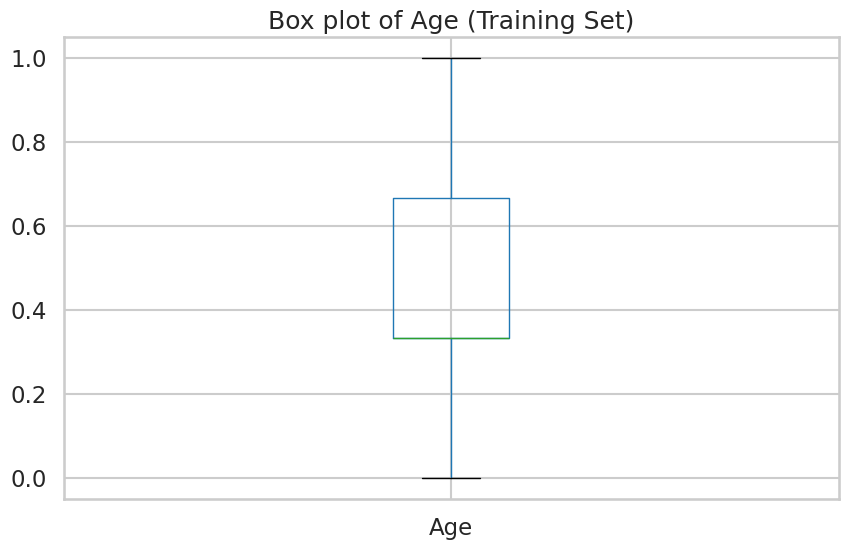

Religion - Number of Outliers: 11


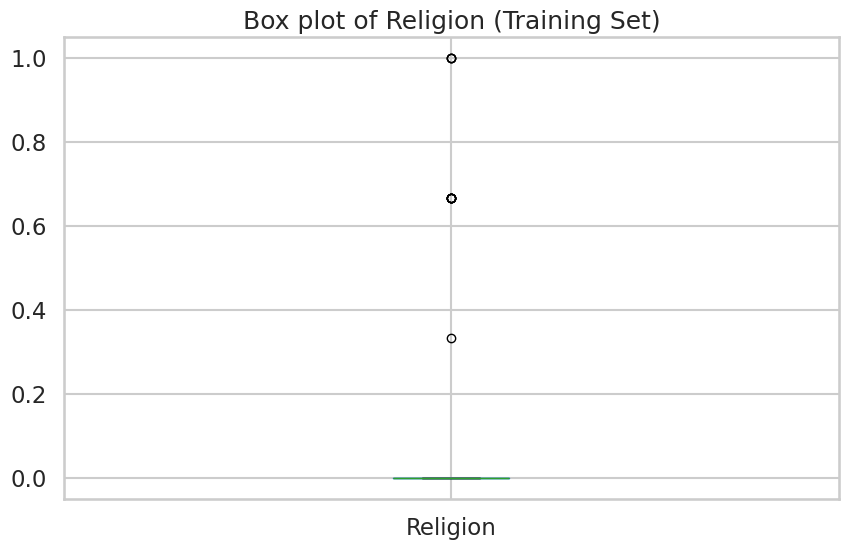

Ethnicity - Number of Outliers: 16


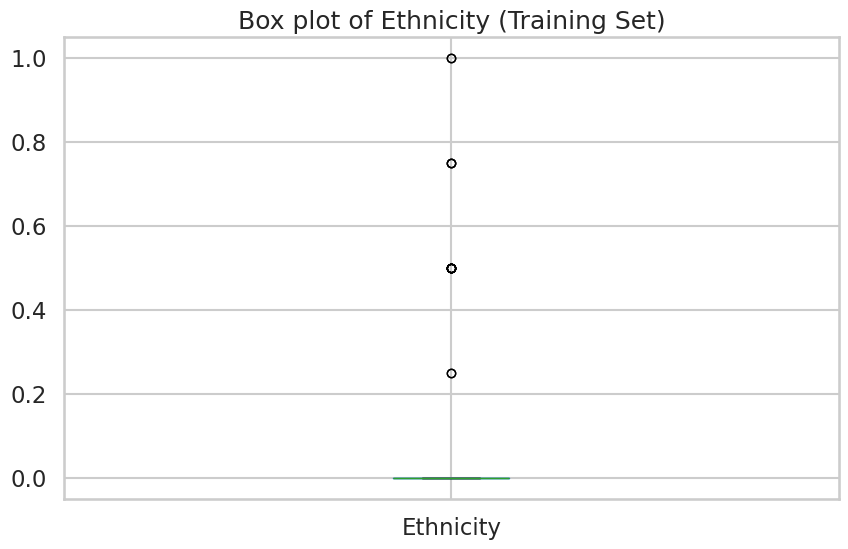

Marital status - Number of Outliers: 25


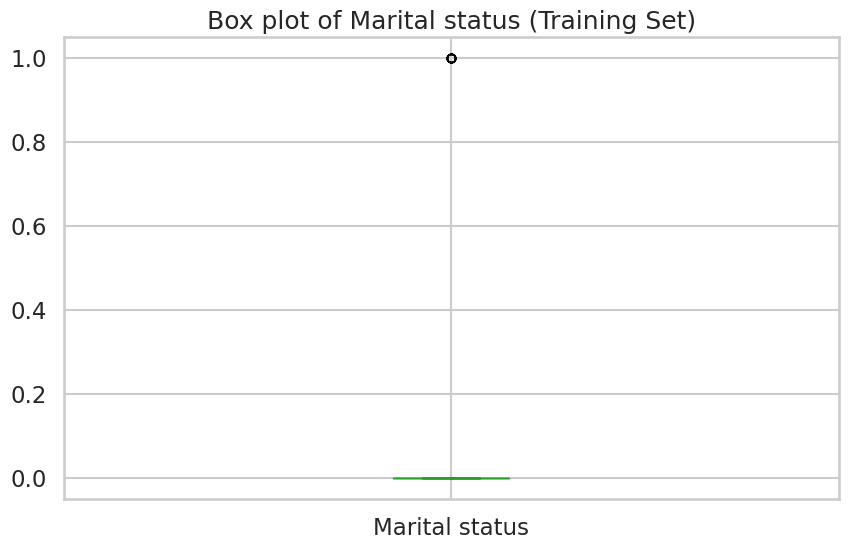

Marriage period - Number of Outliers: 0


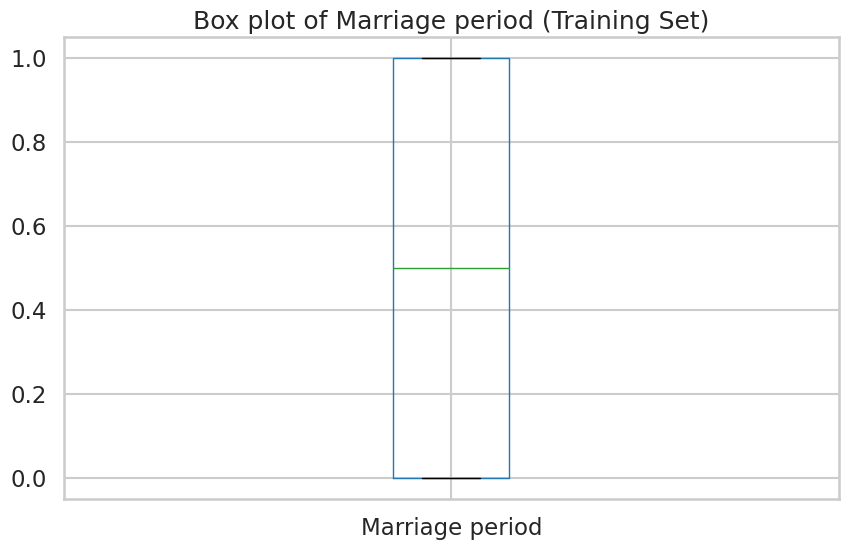

No. of children - Number of Outliers: 0


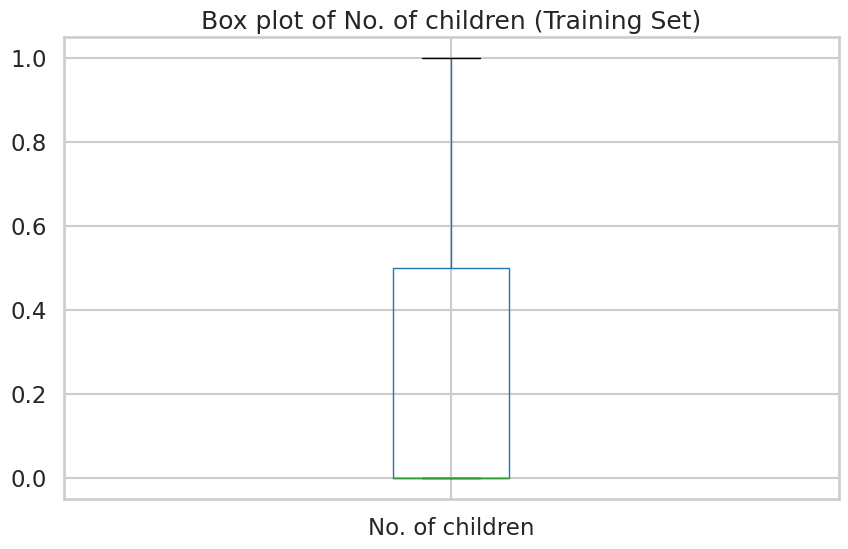

Educational level - Number of Outliers: 0


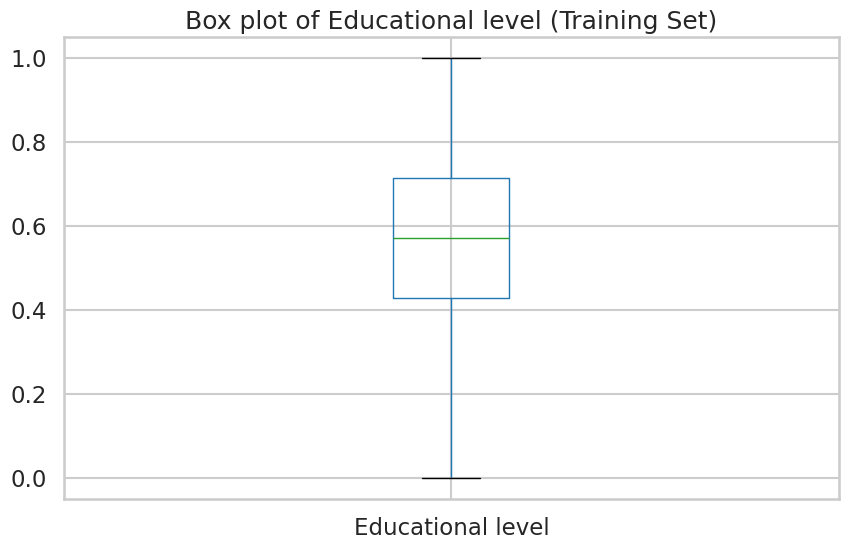

Employment status - Number of Outliers: 8


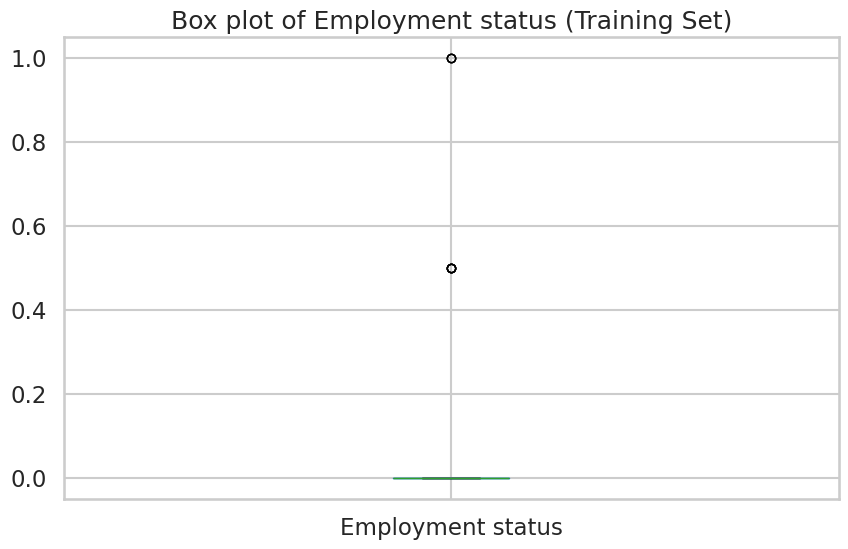

Working period - Number of Outliers: 13


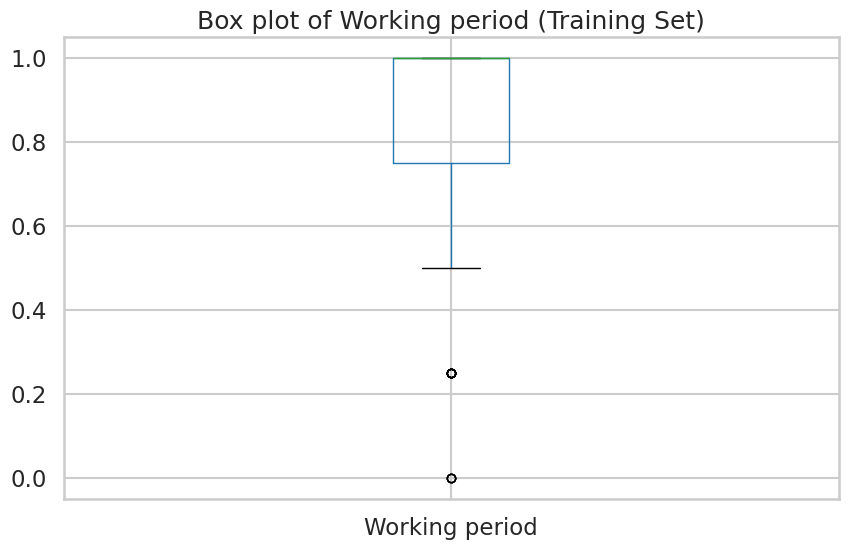

Household income - Number of Outliers: 0


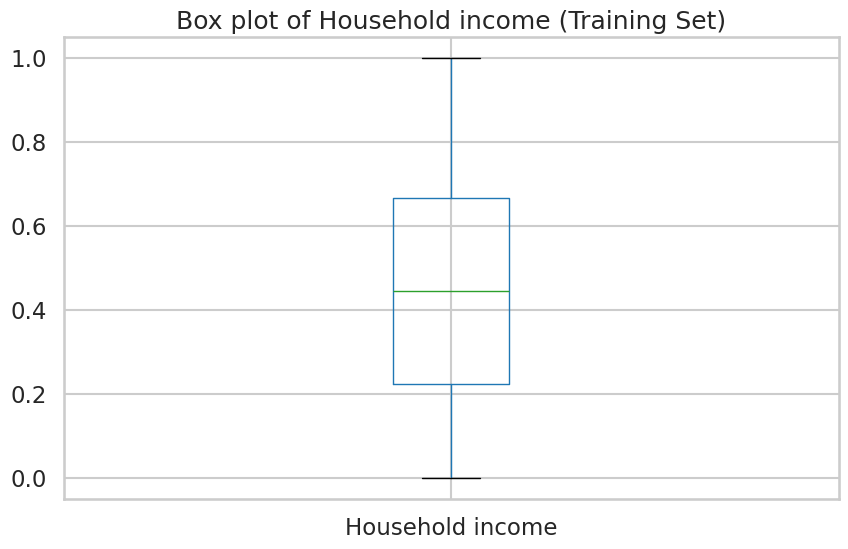

Sperm quality - Number of Outliers: 29


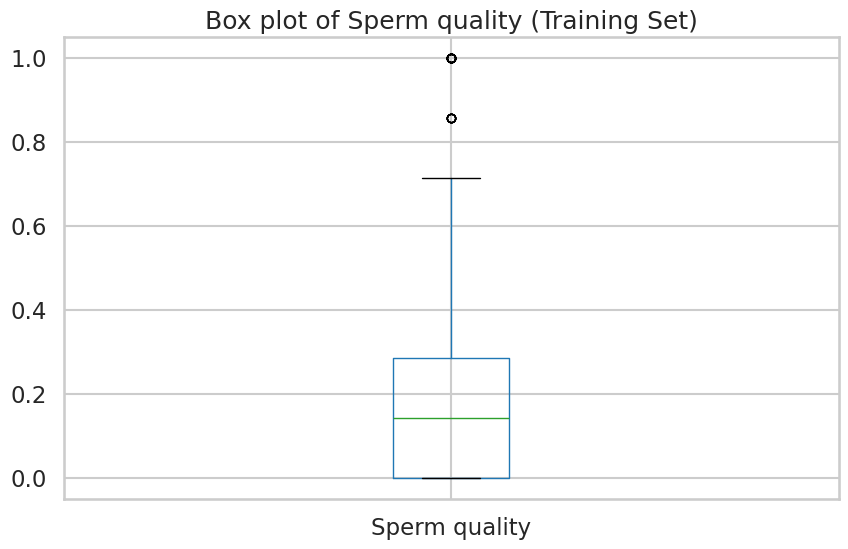

JS1 - Number of Outliers: 19


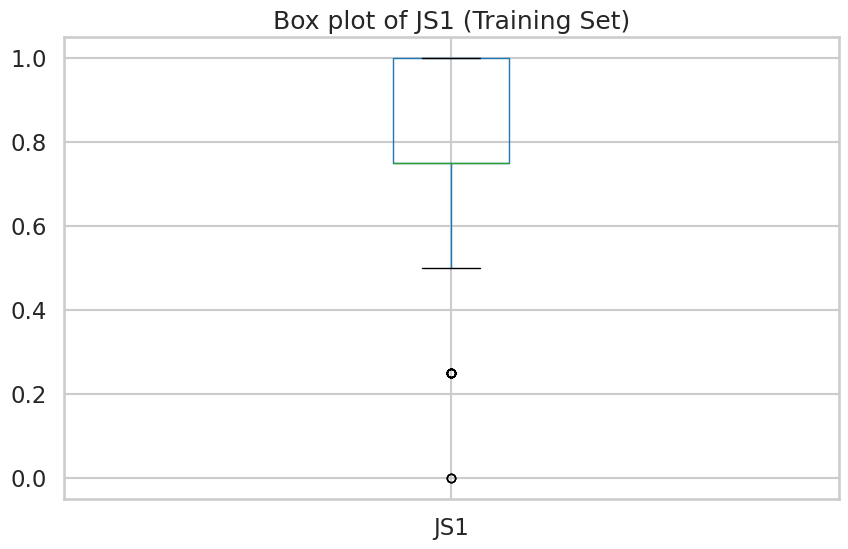

JS2 - Number of Outliers: 0


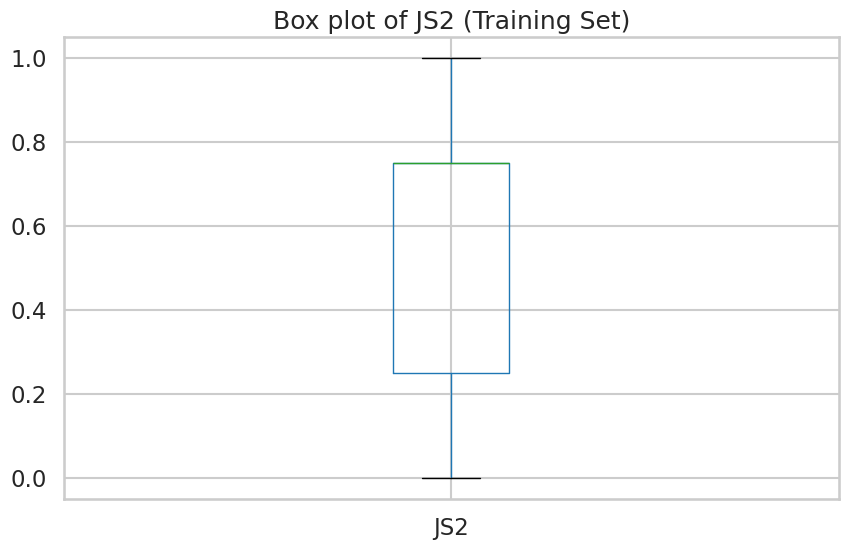

JS3 - Number of Outliers: 0


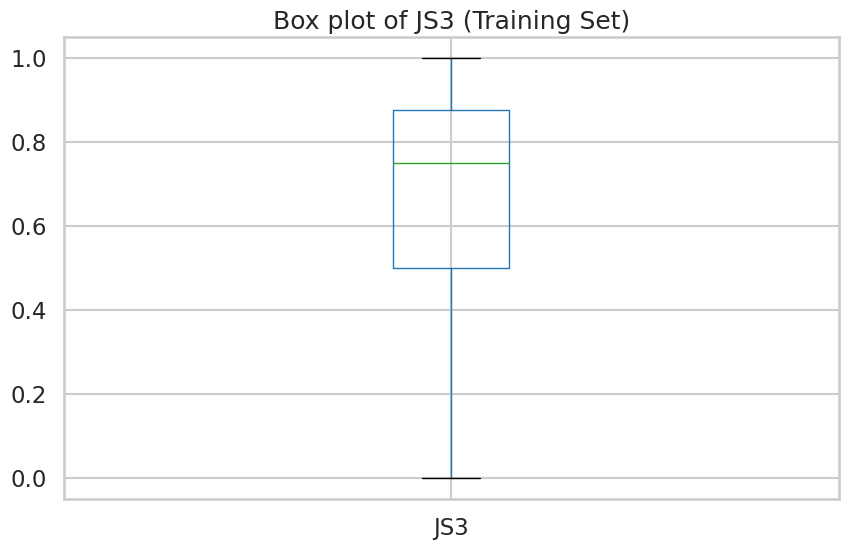

JS4 - Number of Outliers: 9


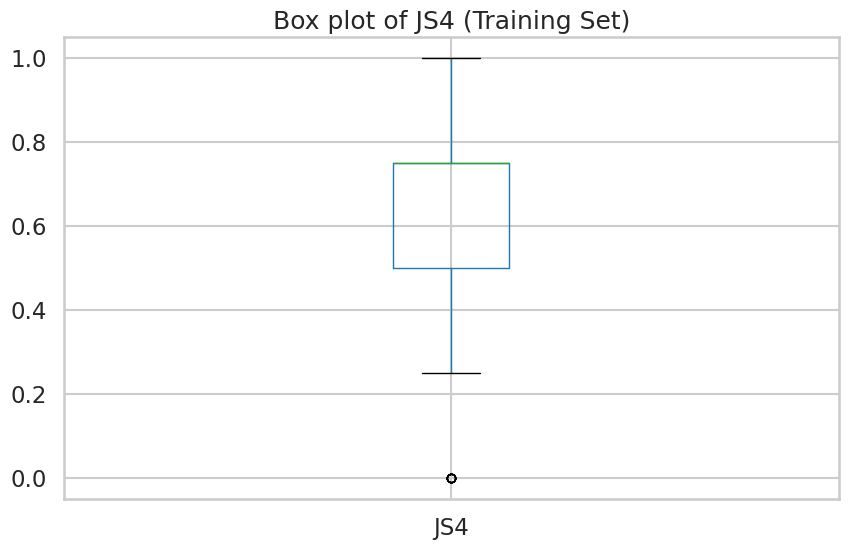

JS5 - Number of Outliers: 0


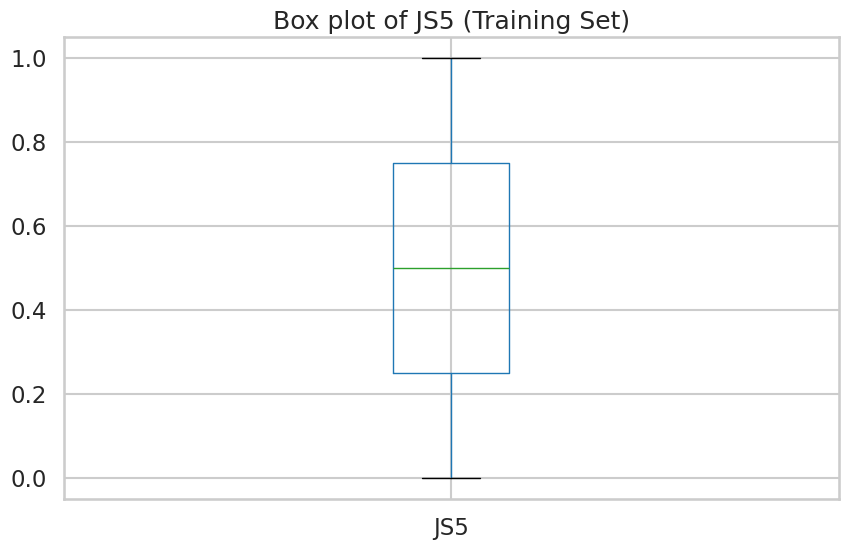

JS6 - Number of Outliers: 10


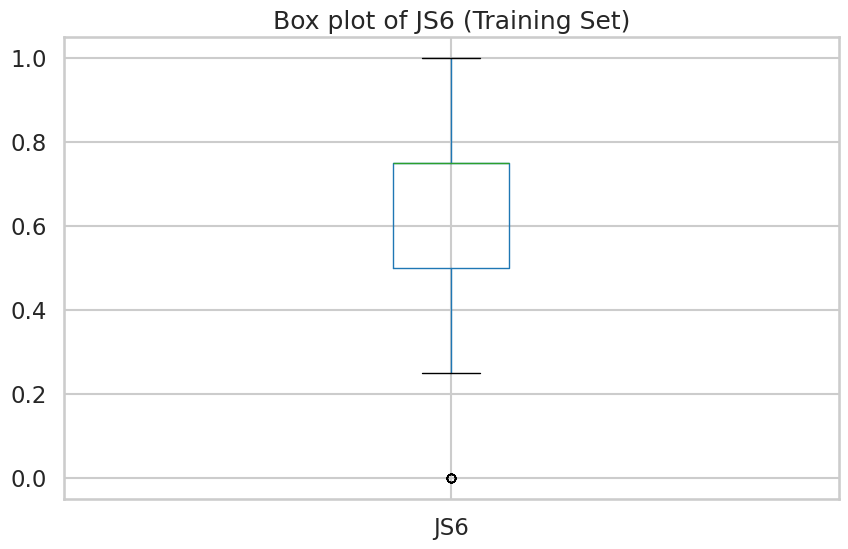

JS7 - Number of Outliers: 0


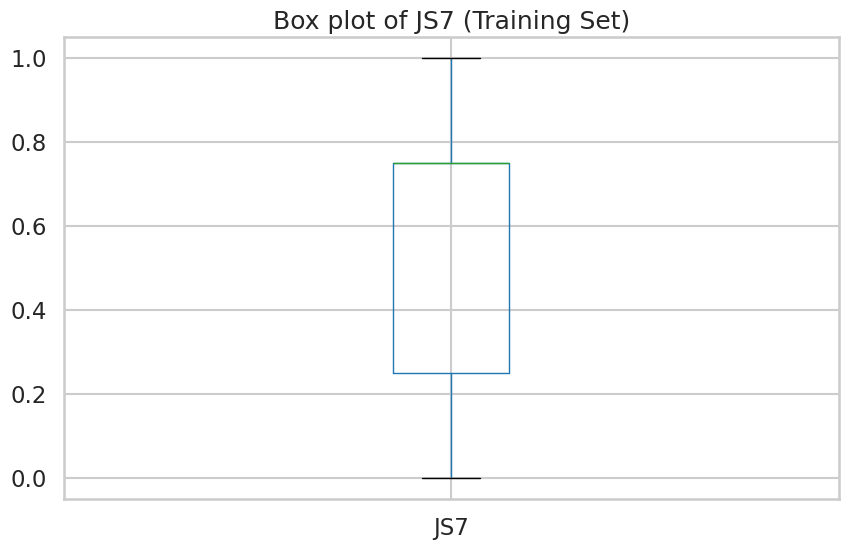

JS8 - Number of Outliers: 3


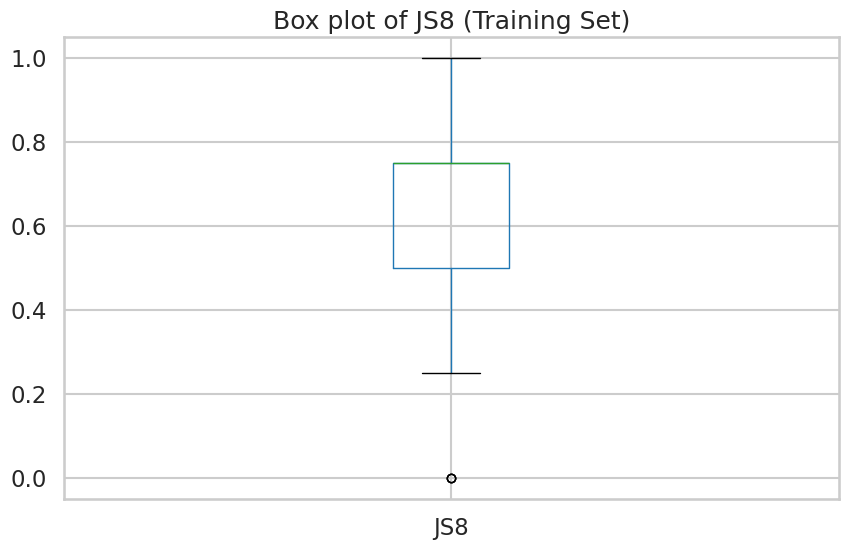

JS9 - Number of Outliers: 103


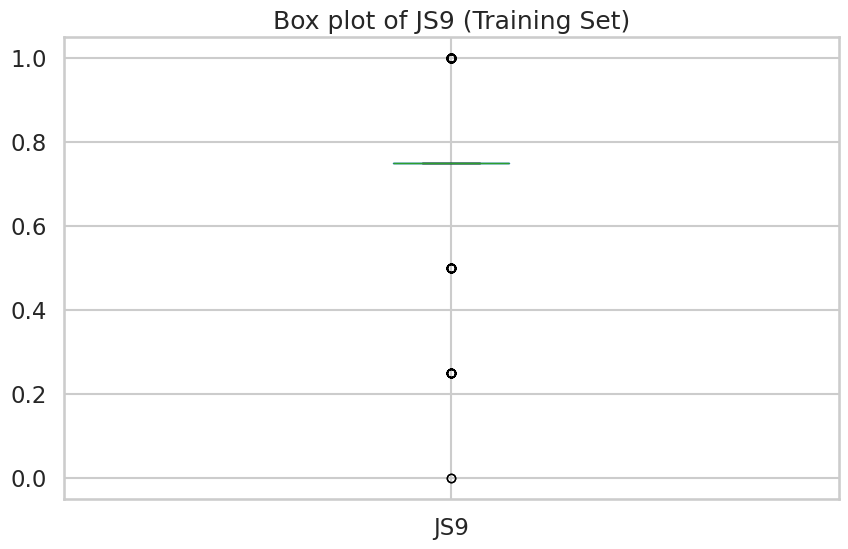

JS10 - Number of Outliers: 25


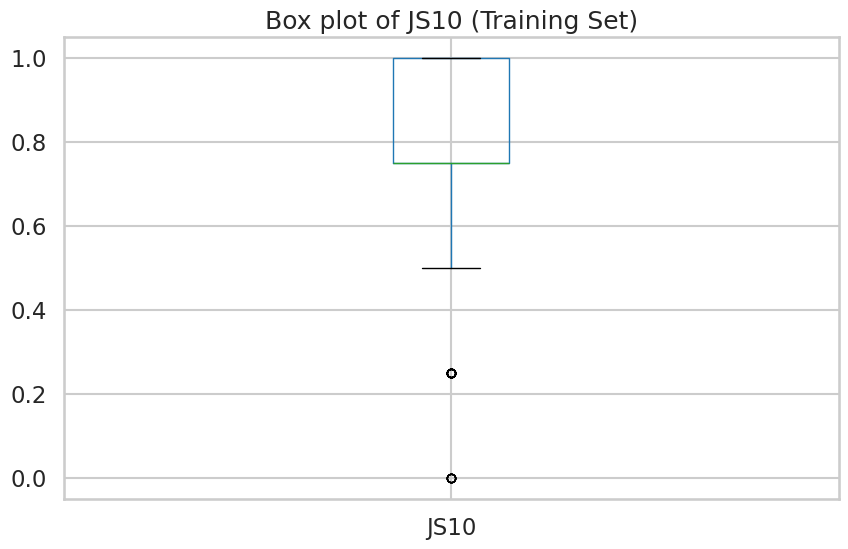

JS11 - Number of Outliers: 8


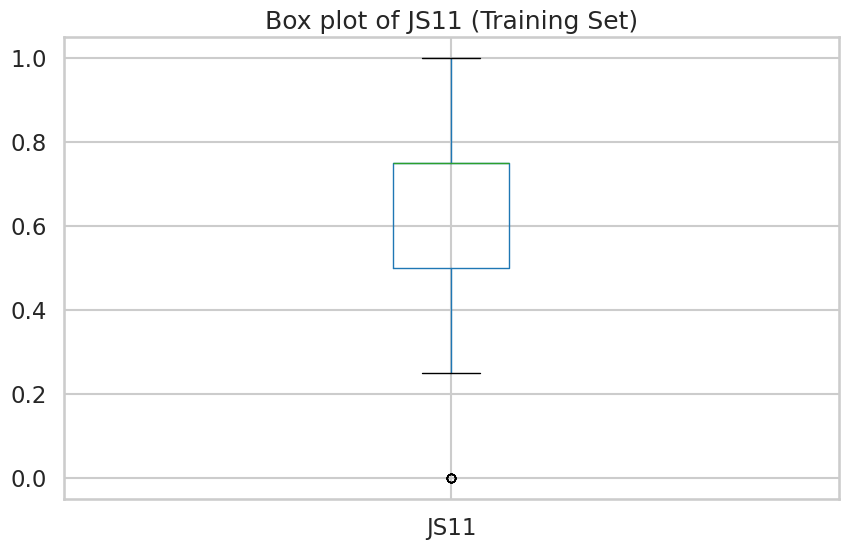

JS12 - Number of Outliers: 8


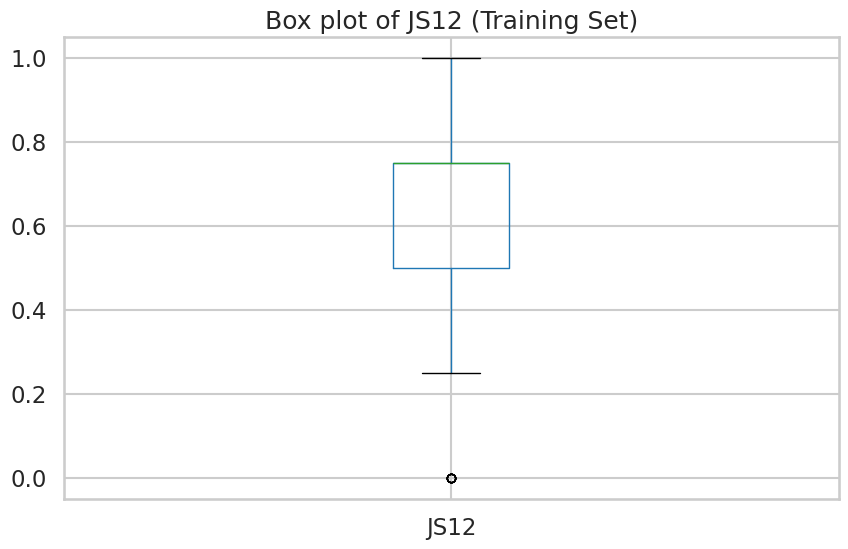

JS13 - Number of Outliers: 6


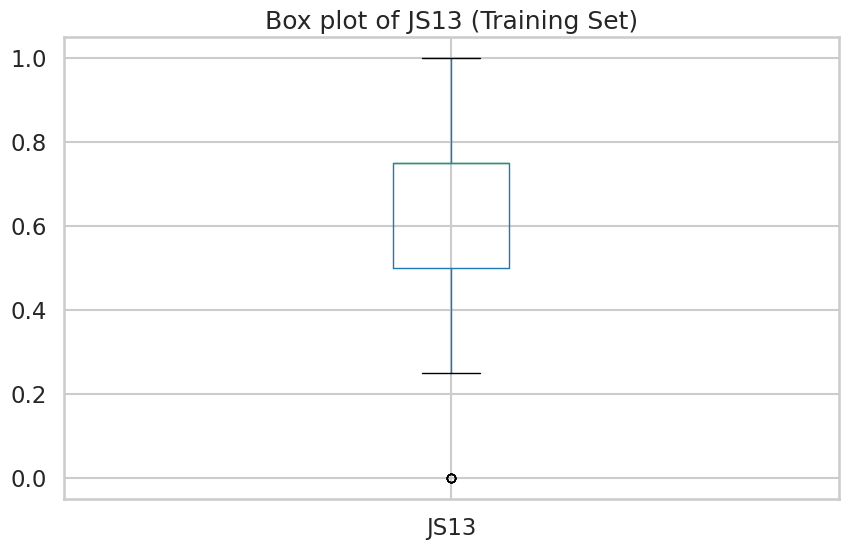

JS14 - Number of Outliers: 6


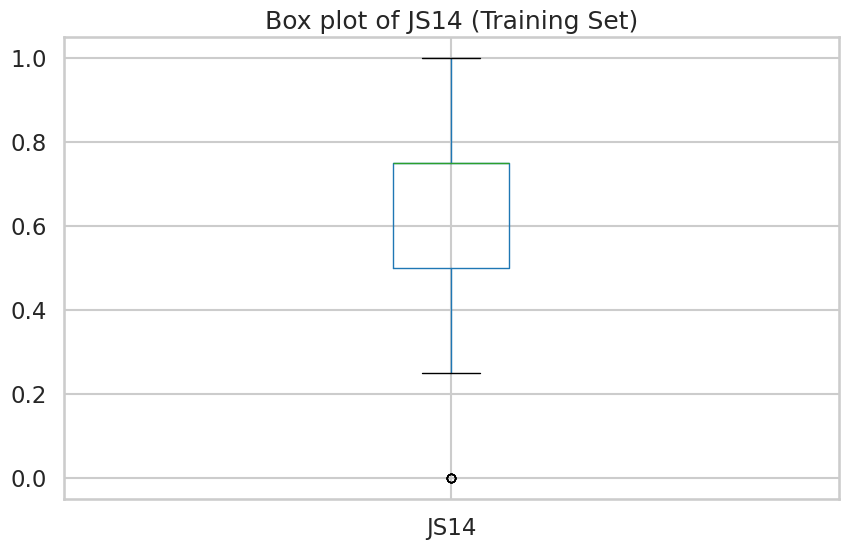

JS15 - Number of Outliers: 0


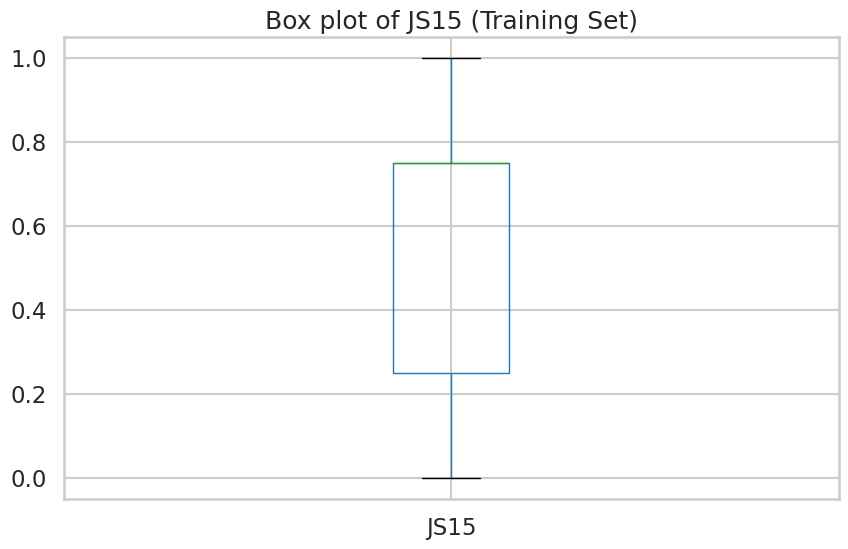

JS16 - Number of Outliers: 8


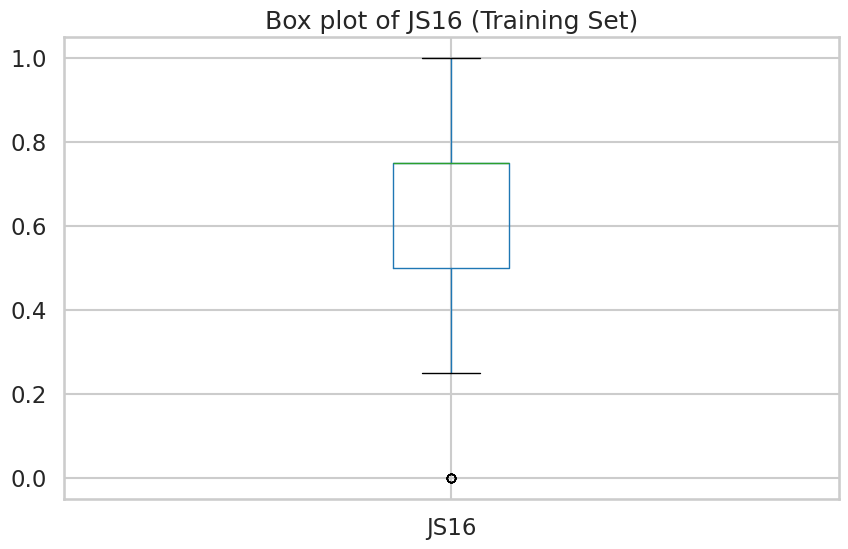

JS17 - Number of Outliers: 3


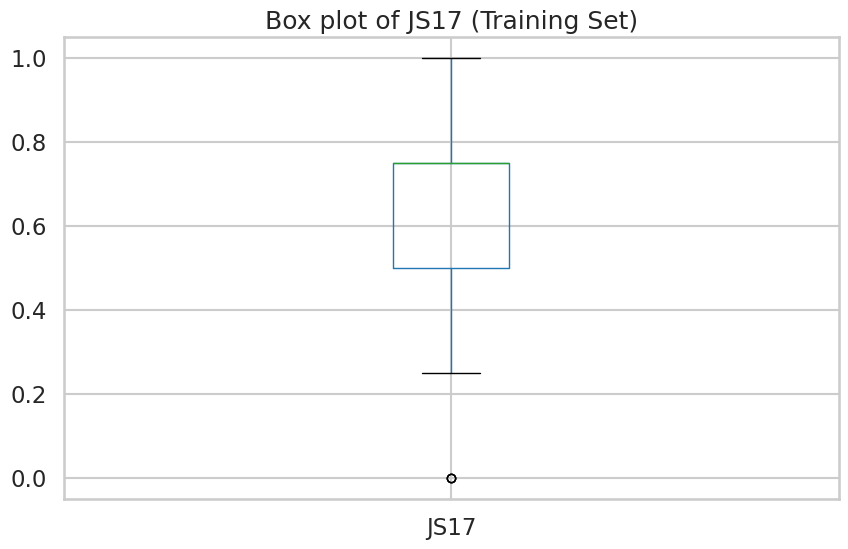

JS18 - Number of Outliers: 17


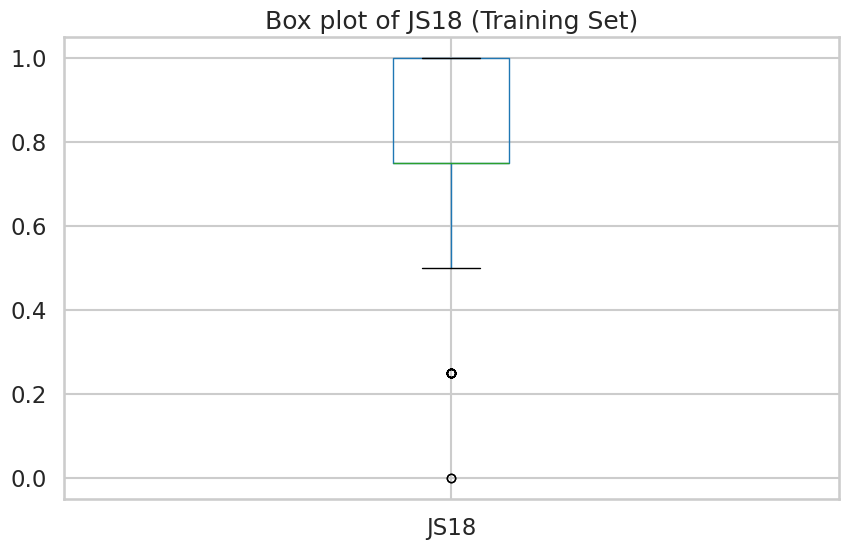

JS19 - Number of Outliers: 4


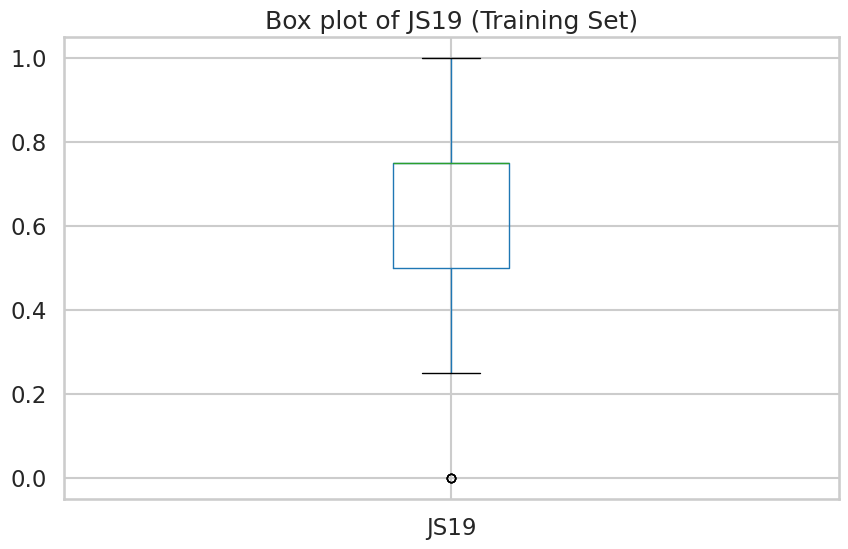

JS20 - Number of Outliers: 4


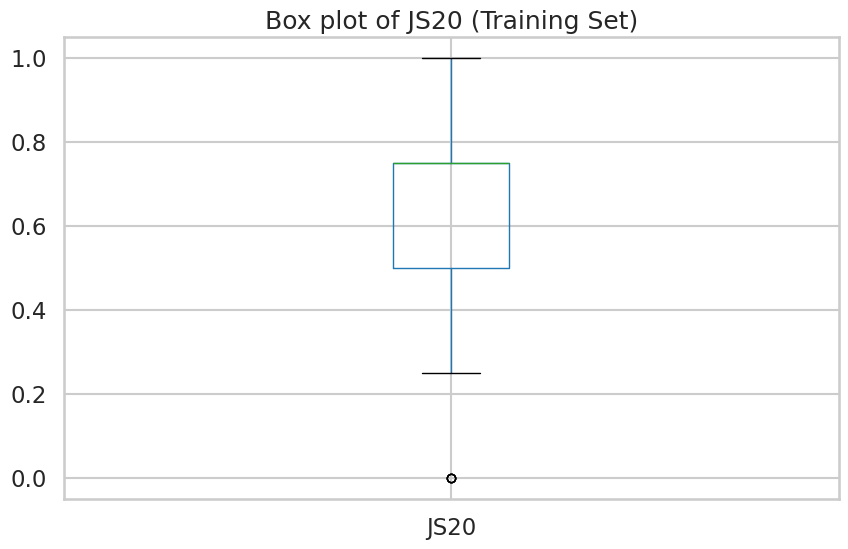

JS21 - Number of Outliers: 0


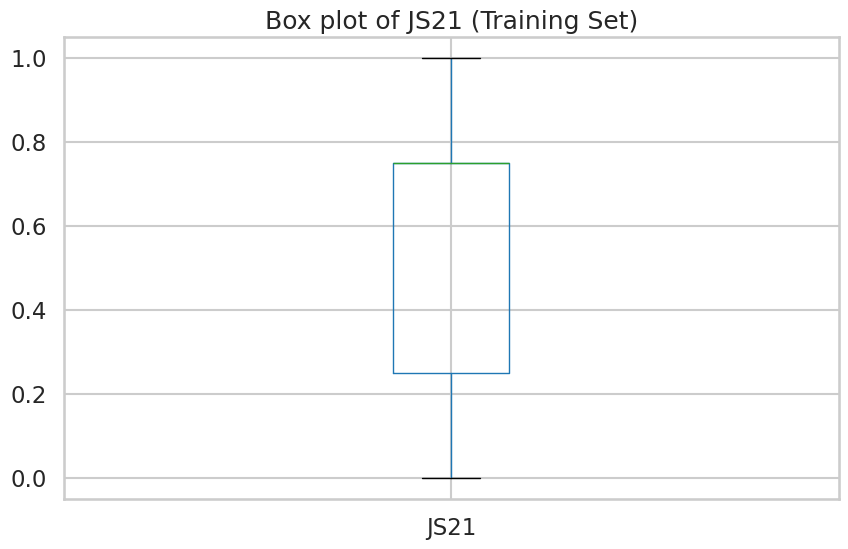

JS22 - Number of Outliers: 0


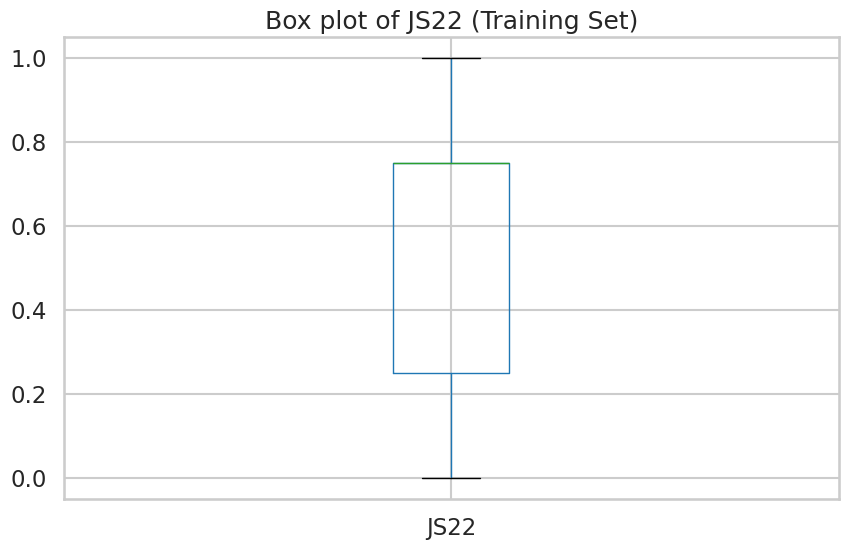

JS23 - Number of Outliers: 0


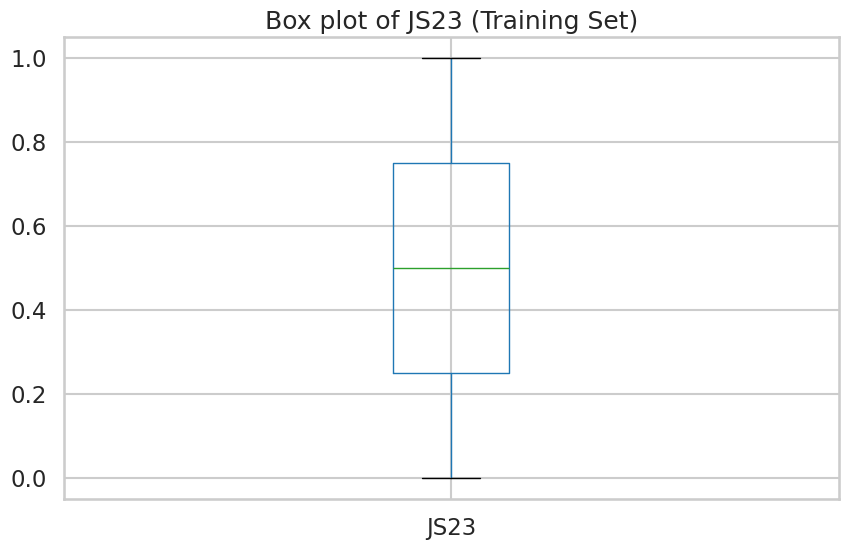

JS24 - Number of Outliers: 0


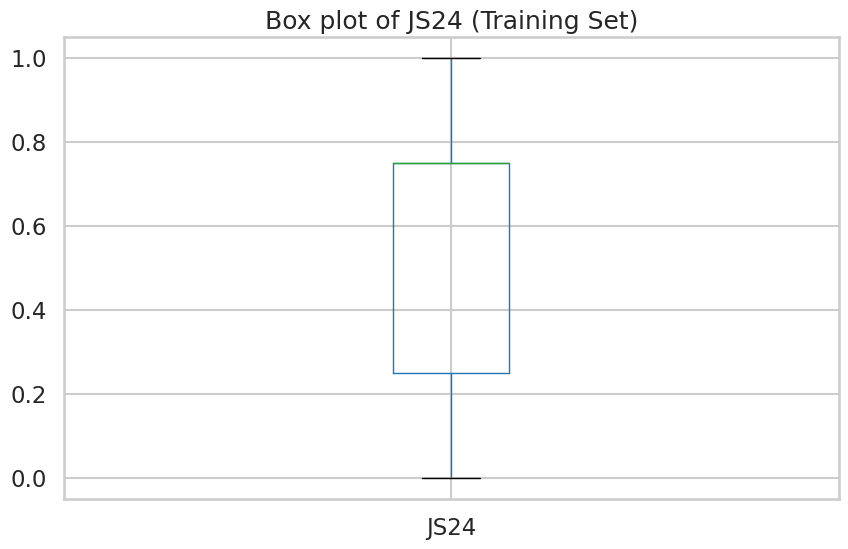

JS25 - Number of Outliers: 8


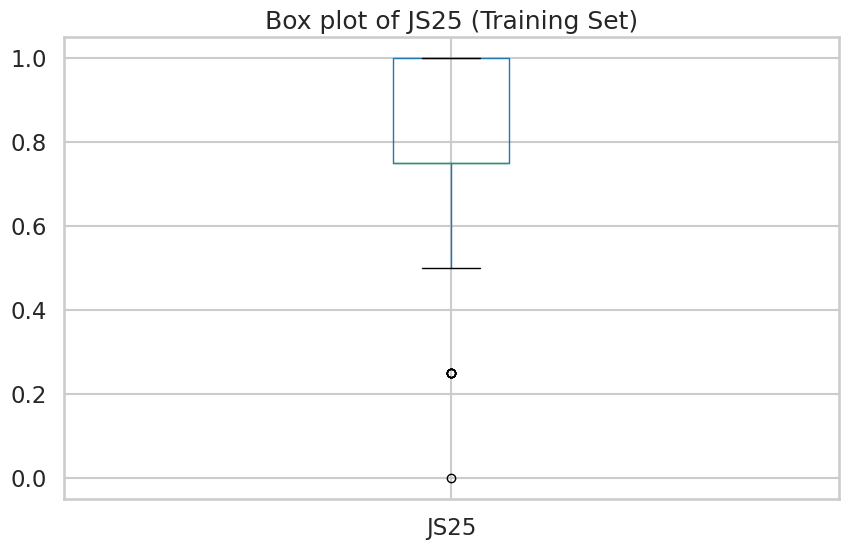

JS26 - Number of Outliers: 8


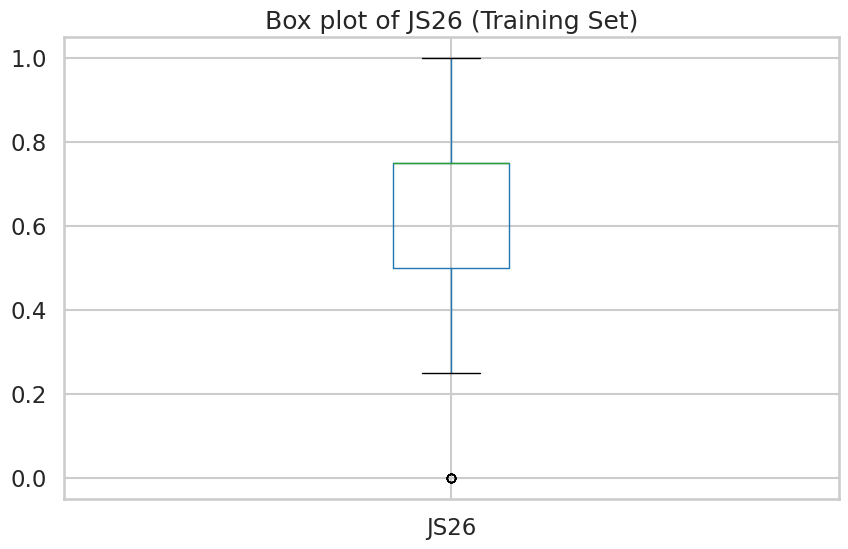

JS27 - Number of Outliers: 92


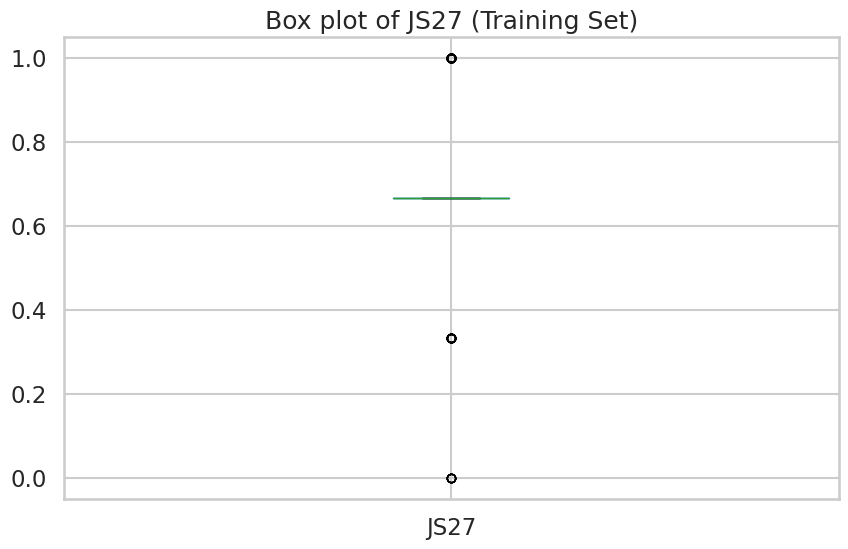

JS28 - Number of Outliers: 30


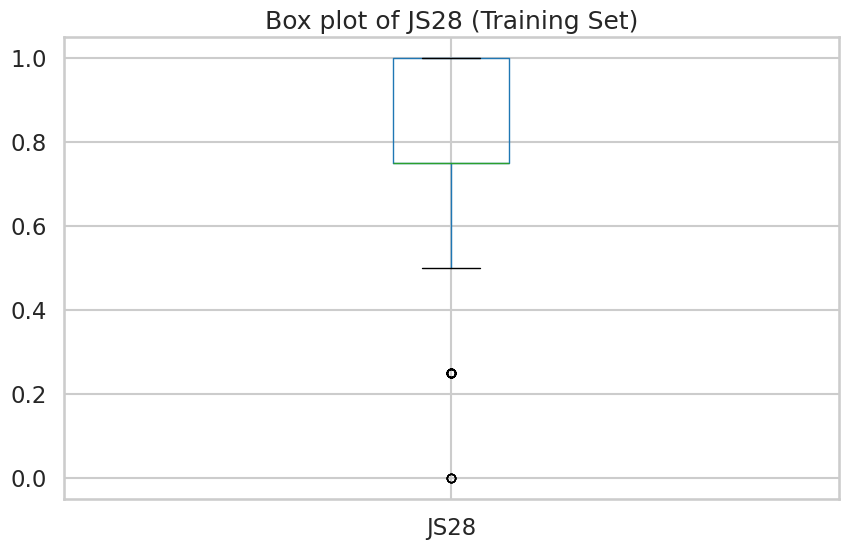

JS29 - Number of Outliers: 28


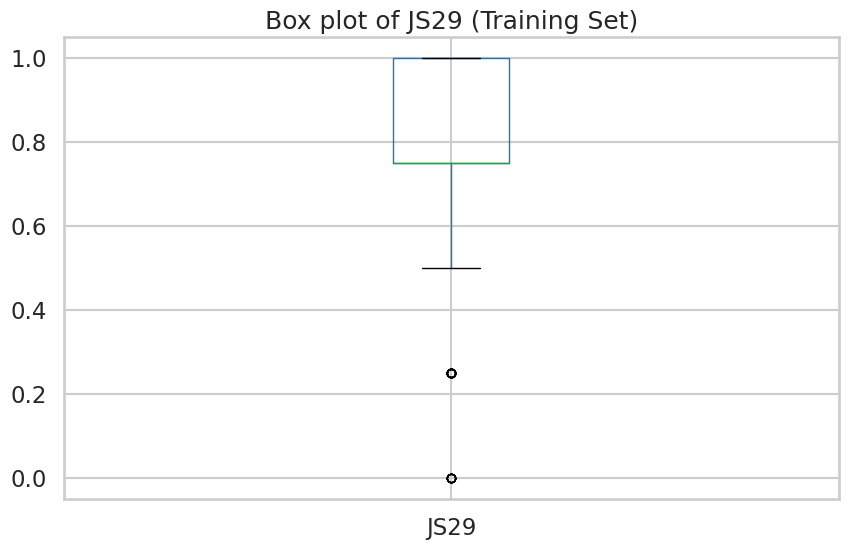

JS30 - Number of Outliers: 5


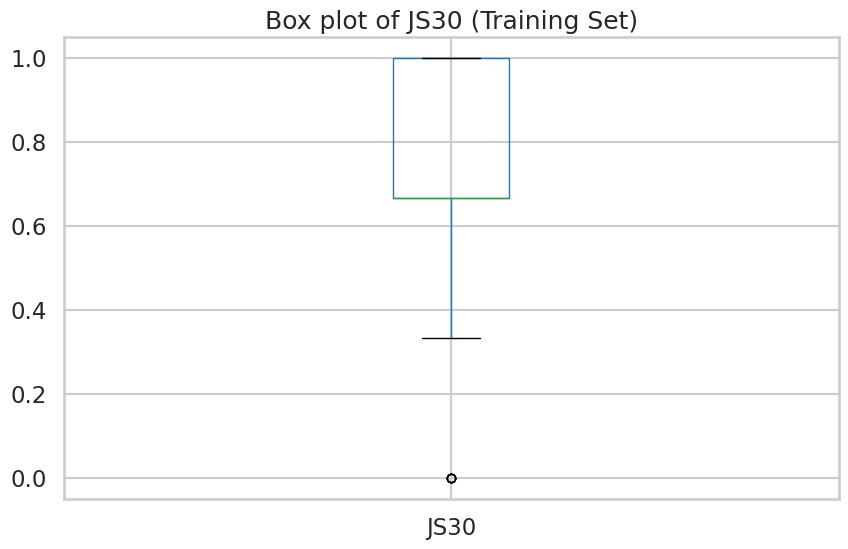

JS31 - Number of Outliers: 5


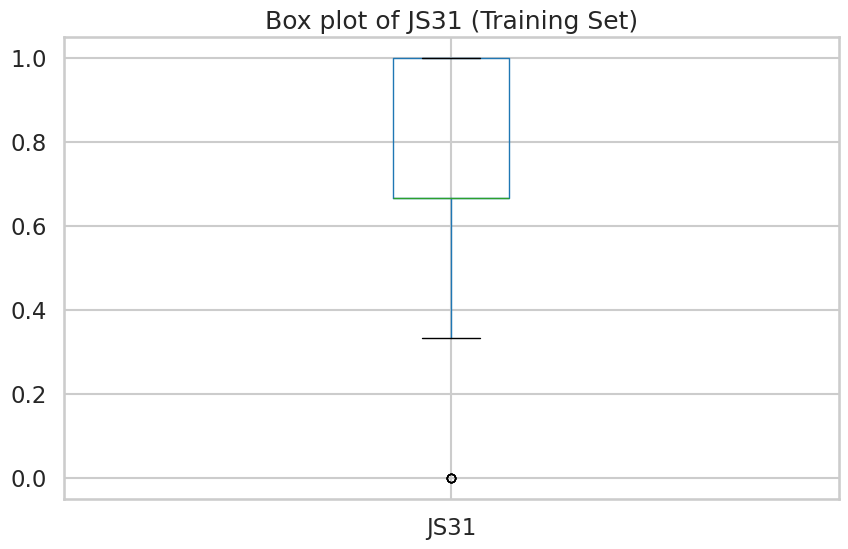

JS32 - Number of Outliers: 11


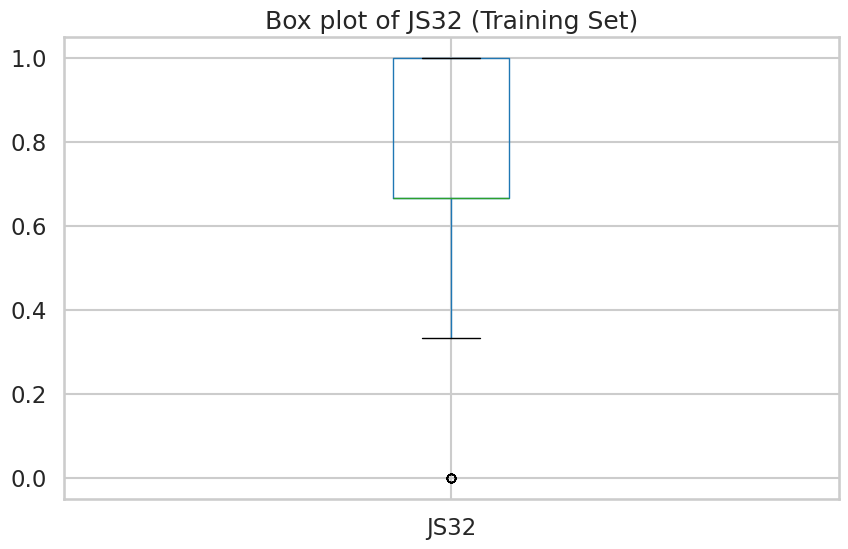

JS33 - Number of Outliers: 48


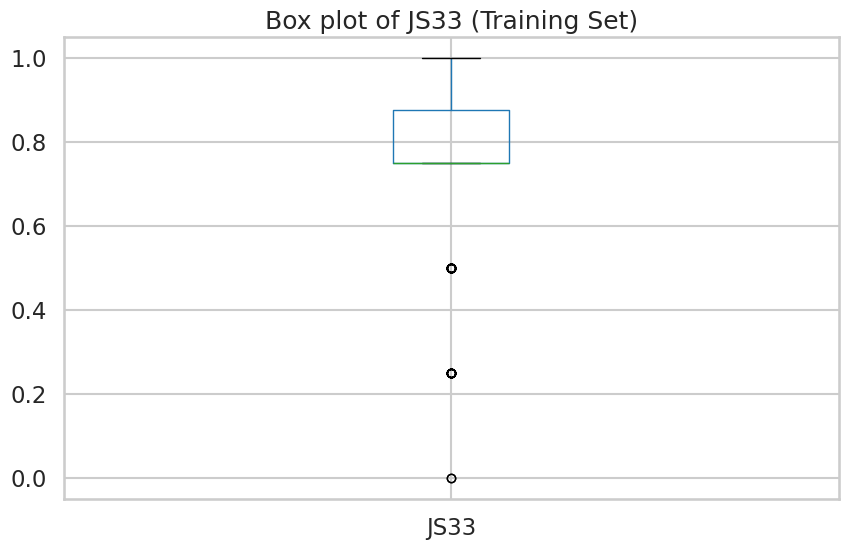

JS34 - Number of Outliers: 24


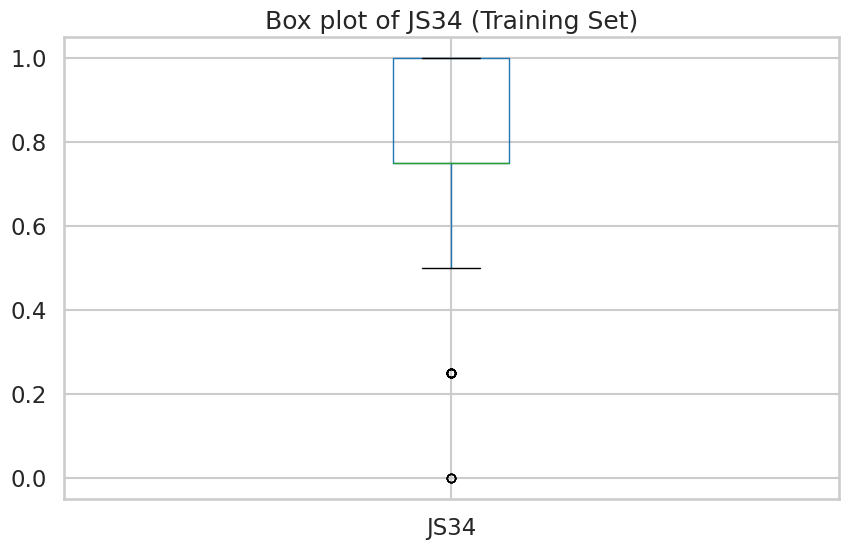

JS35 - Number of Outliers: 4


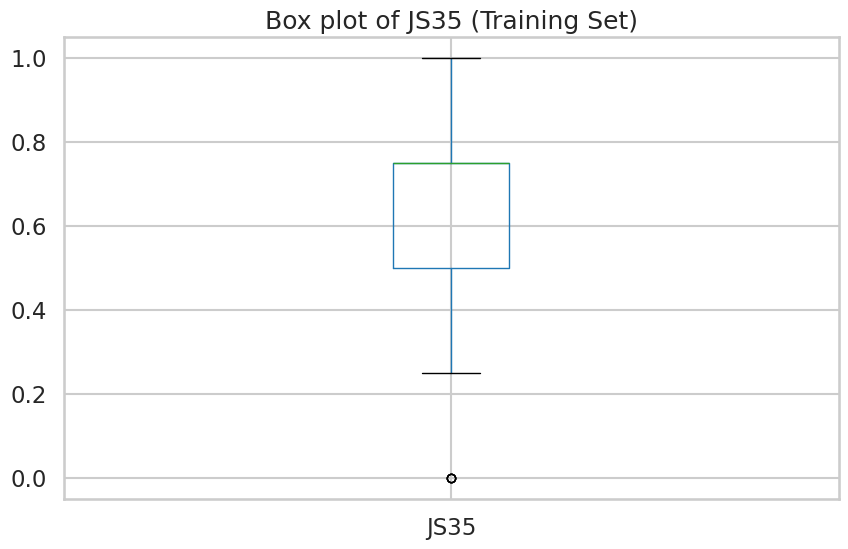

JS36 - Number of Outliers: 5


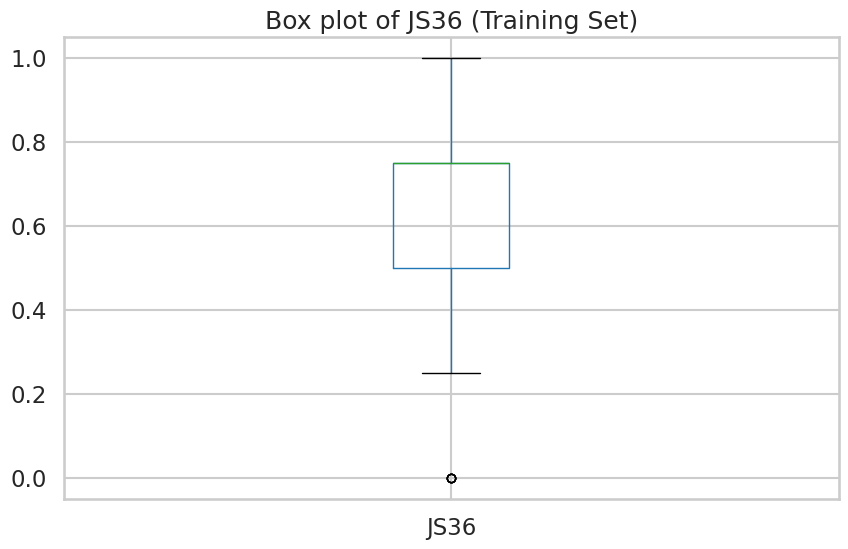

JP1 - Number of Outliers: 7


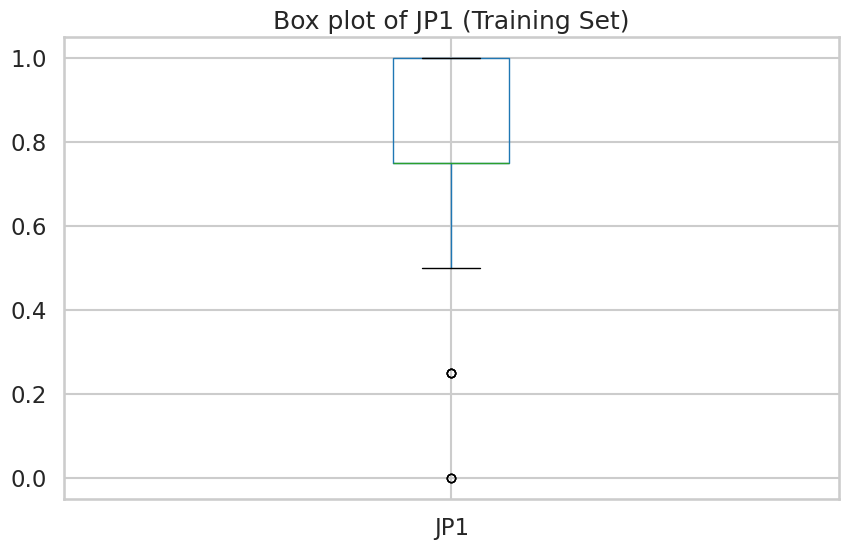

JP2 - Number of Outliers: 6


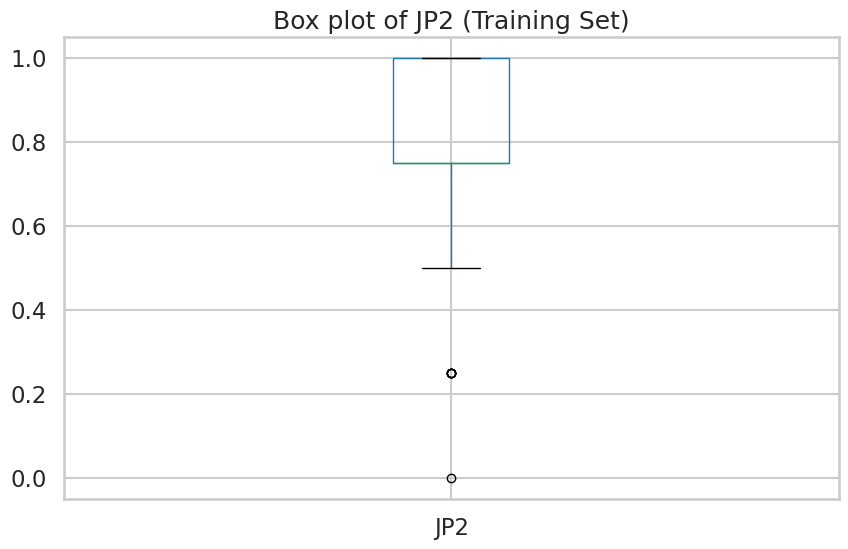

JP3 - Number of Outliers: 16


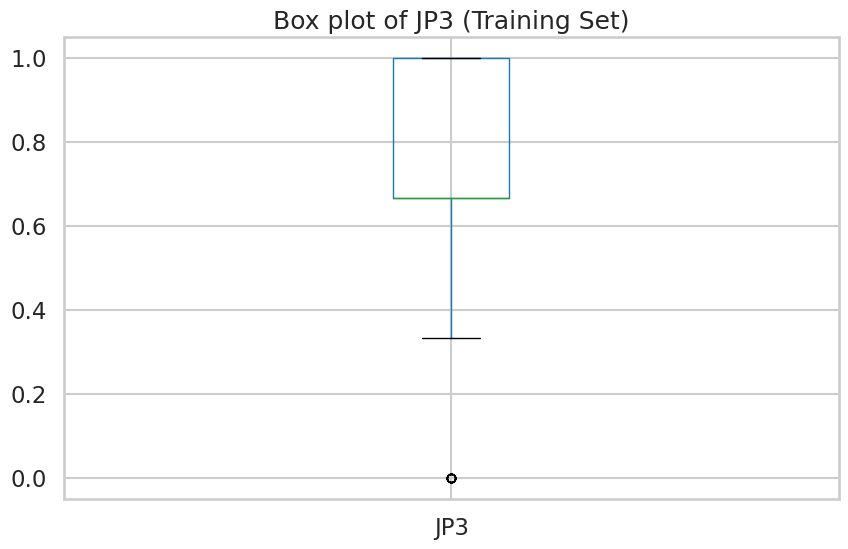

JP4 - Number of Outliers: 25


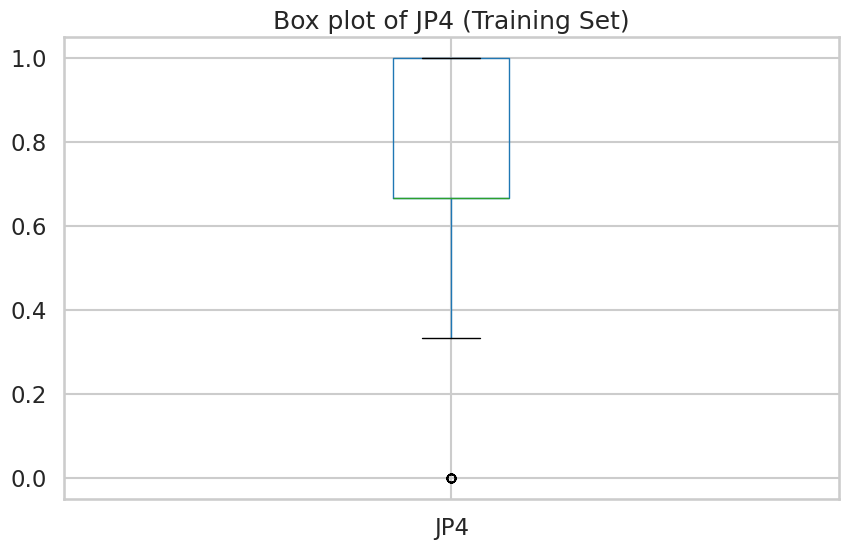

JP5 - Number of Outliers: 12


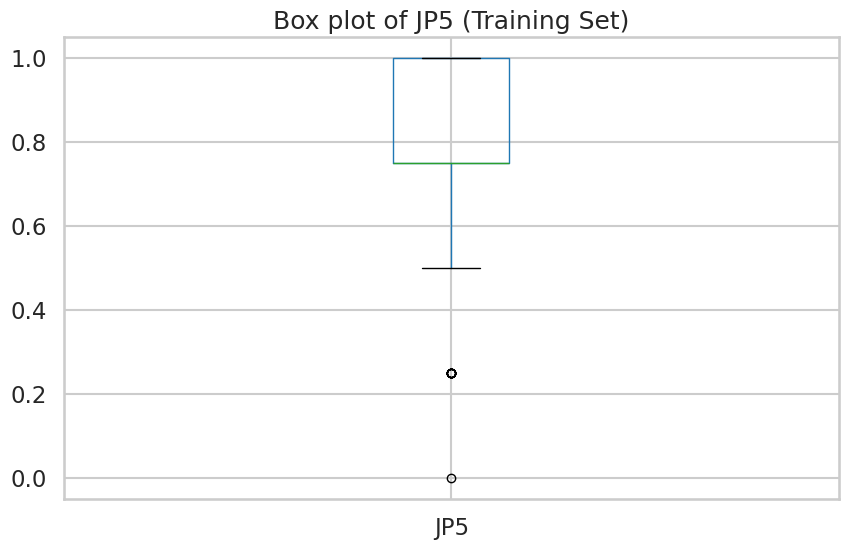

JP6 - Number of Outliers: 3


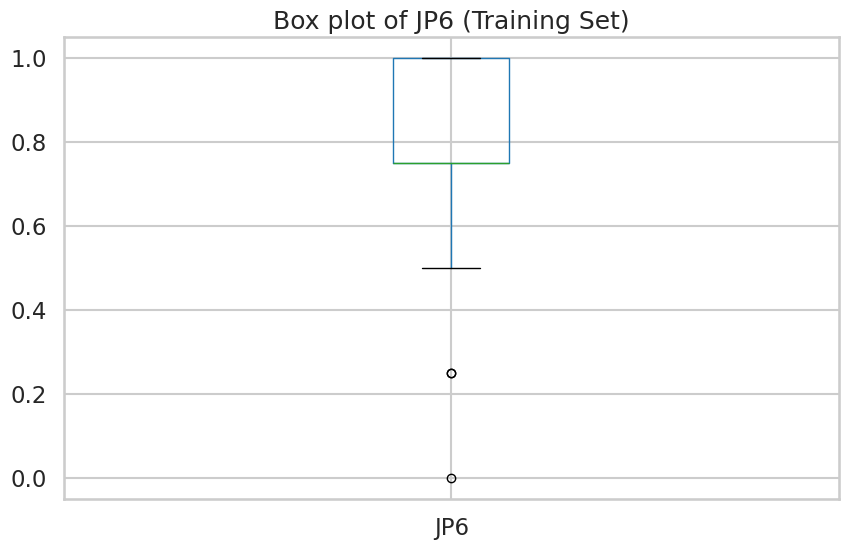

In [44]:
# Step 2: Detect and handle outliers in the training set
for column in X_train.columns:
    # Calculate IQR
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    print(f"{column} - Number of Outliers: {len(outliers)}")

    # Visualize outliers with a box plot
    plt.figure(figsize=(10, 6))
    X_train.boxplot([column])
    plt.title(f"Box plot of {column} (Training Set)")
    plt.show()

    # Replace outliers with the column mean (excluding outliers)
    mean_value = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)][column].mean()
    X_train.loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound), column] = mean_value


#Feature Selection

# ANOVA + RFECV

In [45]:

# Combine and deduplicate feature names
combined_features = [
    "JS36", "JS23", "JS35", "Household income", "JS33", "JS21", "JS17", "JS11", "JS24",
    "JS26", "JP4", "Sperm quality", "JS5", "JS6", "JS15", "JS4", "JS7", "Educational level",
    "JS20", "JS14", "JS22", "JS29", "JS10", "JS12", "JS2", "JS28", "JS18", "JS25", "JS8",
    "JS31", "JS30", "JP6", "JS3", "JS32", "JS16", "JS13", "JS19", "JS1", "JP5"
]

print("Total number of unique features:", len(combined_features))
print("List of unique features:", combined_features)


# Filter X_train and X_test to keep only these features
X_train_selected = X_train[combined_features]
X_test_selected = X_test[combined_features]

print(f"Shape of X_train after selection: {X_train_selected.shape}")
print(f"Shape of X_test after selection: {X_test_selected.shape}")


Total number of unique features: 39
List of unique features: ['JS36', 'JS23', 'JS35', 'Household income', 'JS33', 'JS21', 'JS17', 'JS11', 'JS24', 'JS26', 'JP4', 'Sperm quality', 'JS5', 'JS6', 'JS15', 'JS4', 'JS7', 'Educational level', 'JS20', 'JS14', 'JS22', 'JS29', 'JS10', 'JS12', 'JS2', 'JS28', 'JS18', 'JS25', 'JS8', 'JS31', 'JS30', 'JP6', 'JS3', 'JS32', 'JS16', 'JS13', 'JS19', 'JS1', 'JP5']
Shape of X_train after selection: (247, 39)
Shape of X_test after selection: (62, 39)


In [46]:
X_train = X_train_selected
X_test = X_test_selected

In [47]:
X_train.shape

(247, 39)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. LOAD REAL AND SYNTHETIC DATA
# -----------------------------------------------------------------------------
# Example: X_train, y_train are already loaded dataframes (39 features + target)
# For demonstration, we assume you already have them in memory.
# Make sure your real data has the same 39 columns as the synthetic files.

# Combine real features + target into a single DataFrame if you wish to compare them together
real_df = pd.concat([X_train, y_train.rename('target')], axis=1)

# Load synthetic data from CSVs (each CSV must contain the same 39 columns + 'target')
synthetic_tvae = pd.read_csv("synthetic_data_tvae.csv")
synthetic_copula_gan = pd.read_csv("synthetic_data_copulaGan.csv")
synthetic_gaussian_copula = pd.read_csv("synthetic_data_gaussian_copula.csv")
synthetic_ctgan = pd.read_csv("synthetic_data_ctgan.csv")

# Ensure columns match your combined_features + 'target'
# E.g., if the CSV doesn't have the exact same column names, rename them accordingly:
# synthetic_tvae.columns = real_df.columns  # Adjust only if needed

# List of features of interest (the 39 you provided)
combined_features = [
    "JS36", "JS23", "JS35", "Household income", "JS33", "JS21", "JS17", "JS11", "JS24",
    "JS26", "JP4", "Sperm quality", "JS5", "JS6", "JS15", "JS4", "JS7", "Educational level",
    "JS20", "JS14", "JS22", "JS29", "JS10", "JS12", "JS2", "JS28", "JS18", "JS25", "JS8",
    "JS31", "JS30", "JP6", "JS3", "JS32", "JS16", "JS13", "JS19", "JS1", "JP5"
]

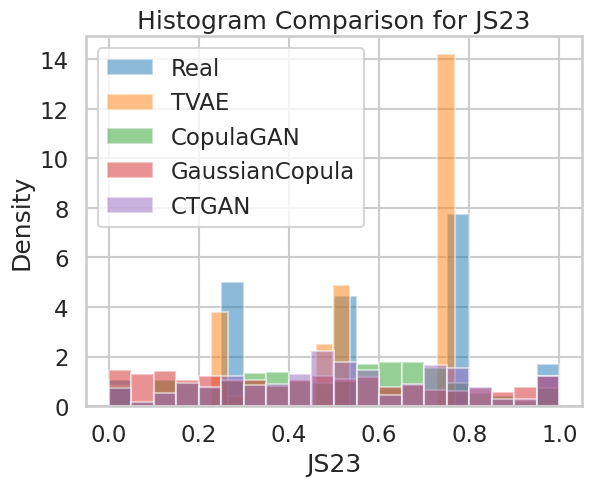

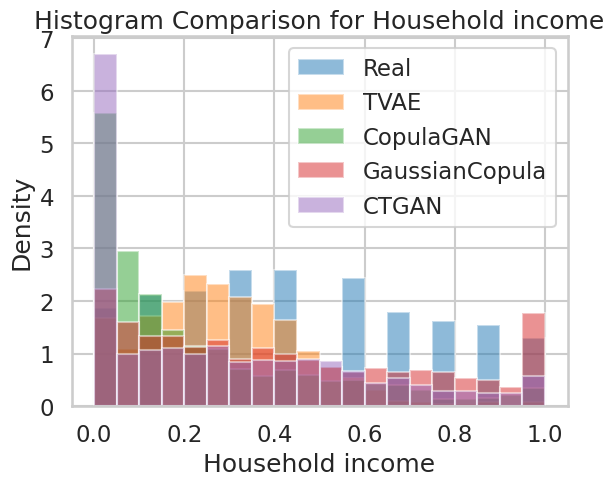

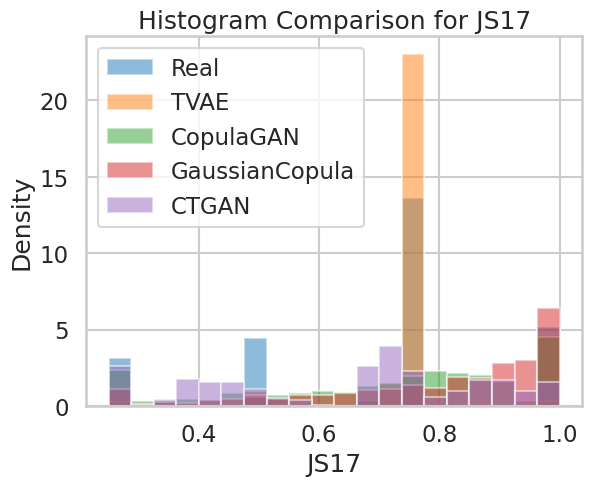

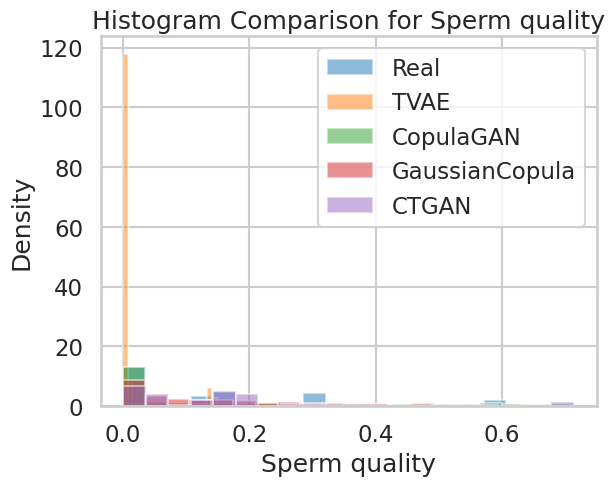

In [69]:
# -----------------------------------------------------------------------------
# 2. HISTOGRAM DISTRIBUTION PLOTS FOR SELECTED FEATURES
# -----------------------------------------------------------------------------
# Choose a few features that are particularly meaningful or varied.
features_to_plot = ["JS23", "Household income", "JS17", "Sperm quality"]

for feature in features_to_plot:
    plt.figure()  # Each plot in its own figure
    # Plot histogram for real data
    plt.hist(real_df[feature].dropna(), bins=20, alpha=0.5, label='Real', density=True)
    # Plot histograms for synthetic data from each method
    plt.hist(synthetic_tvae[feature].dropna(), bins=20, alpha=0.5, label='TVAE', density=True)
    plt.hist(synthetic_copula_gan[feature].dropna(), bins=20, alpha=0.5, label='CopulaGAN', density=True)
    plt.hist(synthetic_gaussian_copula[feature].dropna(), bins=20, alpha=0.5, label='GaussianCopula', density=True)
    plt.hist(synthetic_ctgan[feature].dropna(), bins=20, alpha=0.5, label='CTGAN', density=True)

    plt.title(f"Histogram Comparison for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

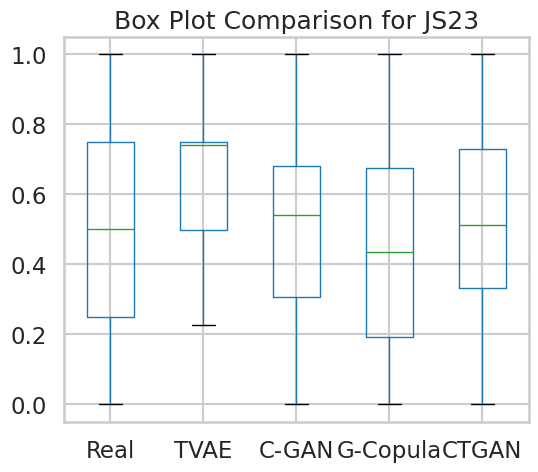

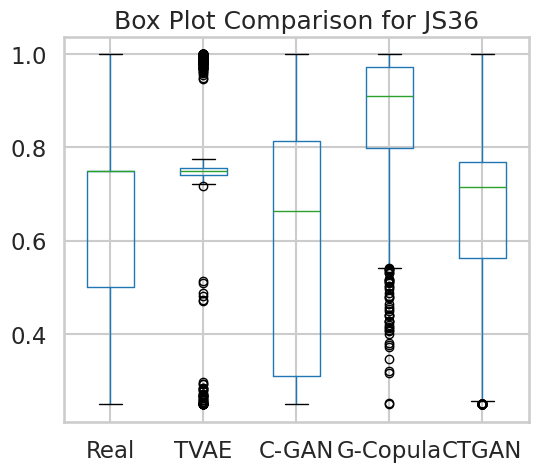

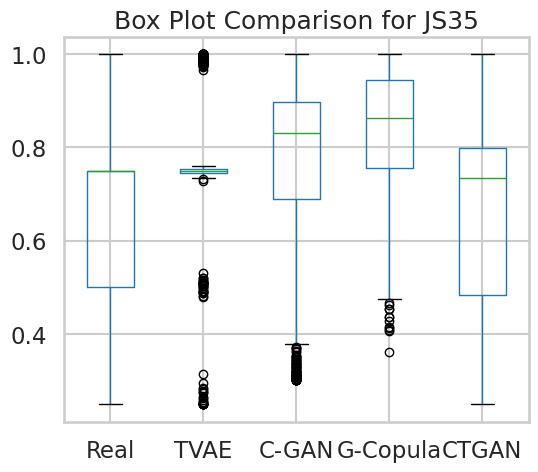

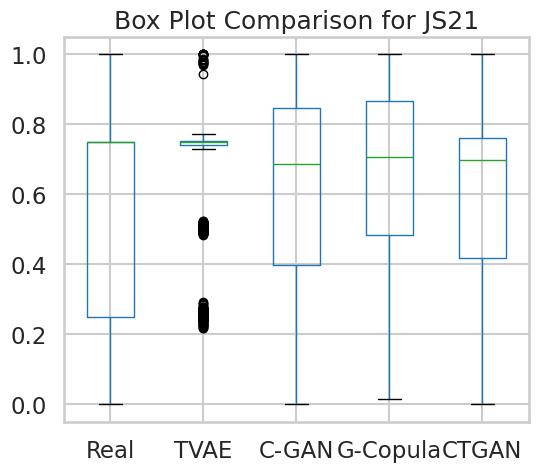

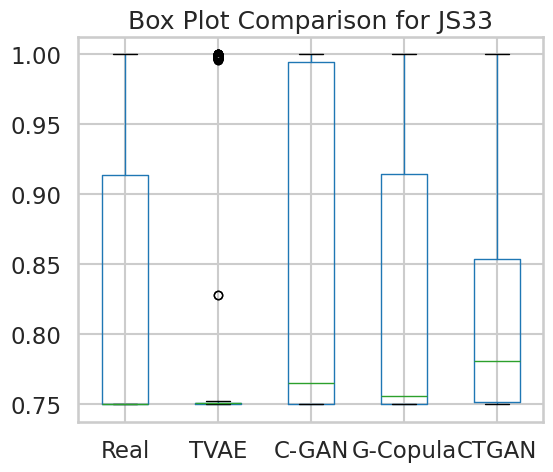

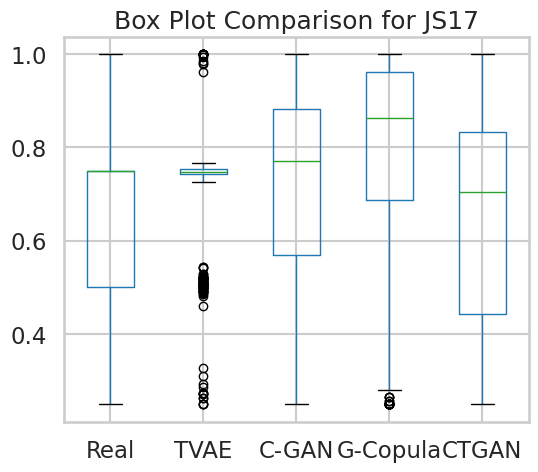

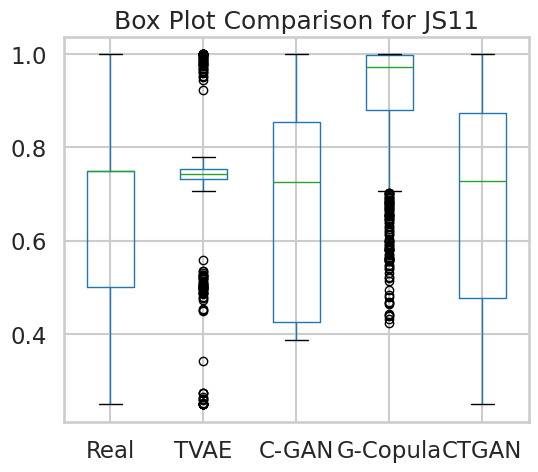

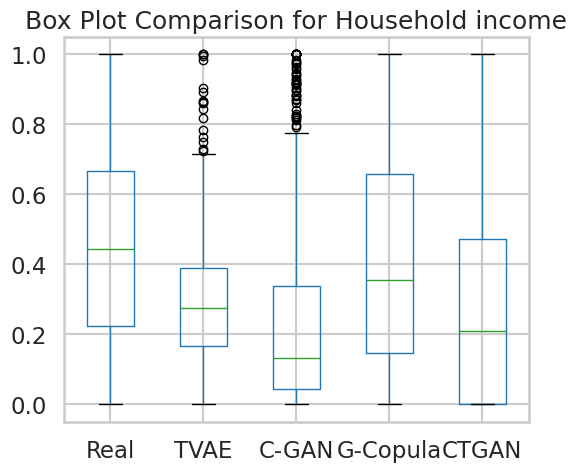

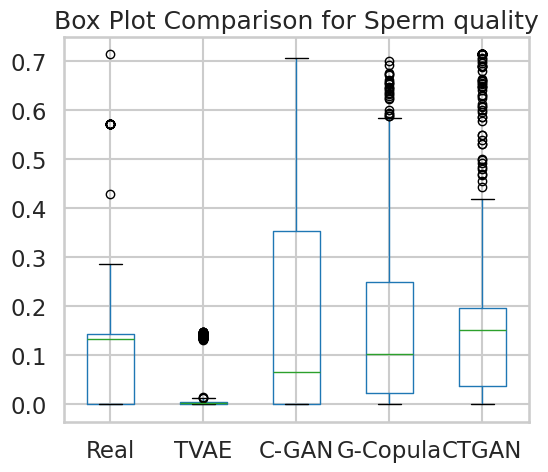

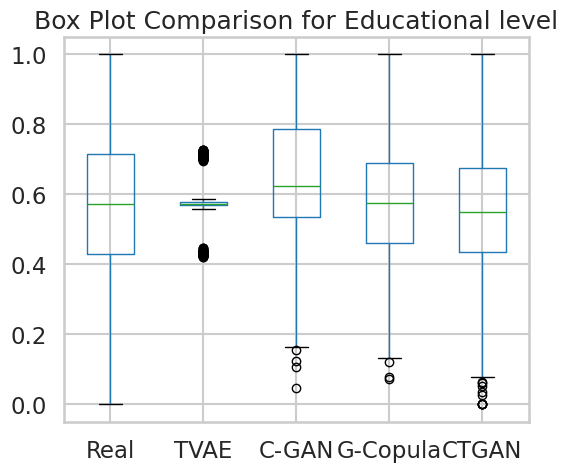

In [80]:
# -----------------------------------------------------------------------------
# 3. BOX PLOTS FOR SELECTED FEATURES
# -----------------------------------------------------------------------------
# Box plots reveal differences in medians, quartiles, and outliers.
# Each synthetic dataset is plotted separately vs. real data.

features_for_boxplot = ["JS23", "JS36", "JS35", "JS21", "JS33",
    "JS17", "JS11", "Household income",
    "Sperm quality", "Educational level"]

for feature in features_for_boxplot:
    # Build a combined DataFrame for easy plotting
    combined_box_df = pd.DataFrame({
        'Real': real_df[feature].dropna(),
        'TVAE': synthetic_tvae[feature].dropna(),
        'C-GAN': synthetic_copula_gan[feature].dropna(),
        'G-Copula': synthetic_gaussian_copula[feature].dropna(),
        'CTGAN': synthetic_ctgan[feature].dropna()
    })

    plt.figure(figsize=(6, 5))
    # Plot box plot directly from the dataframe
    boxplot = combined_box_df.boxplot(return_type='dict')
    plt.title(f"Box Plot Comparison for {feature}")
    # plt.ylabel(feature)
    plt.show()

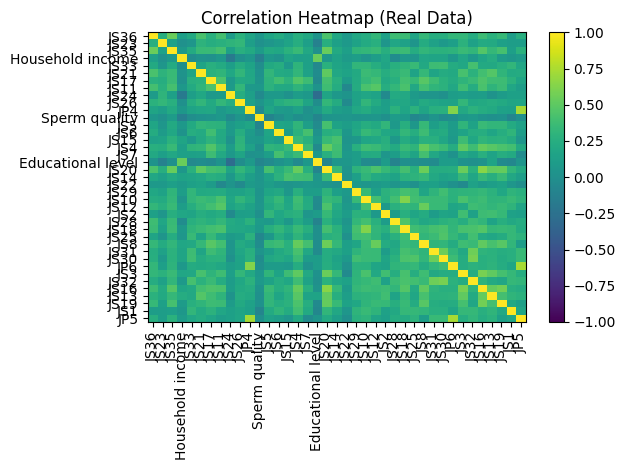

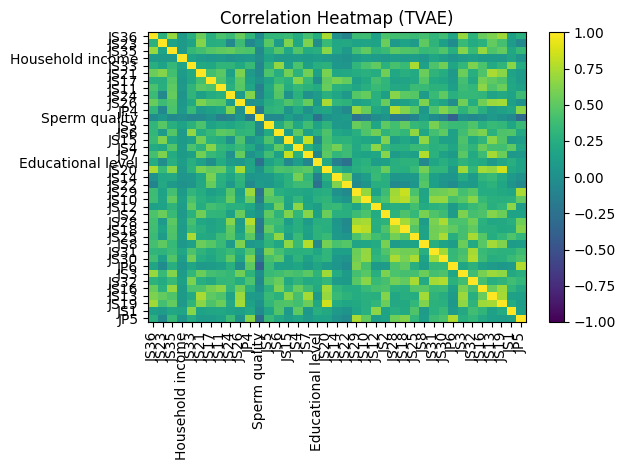

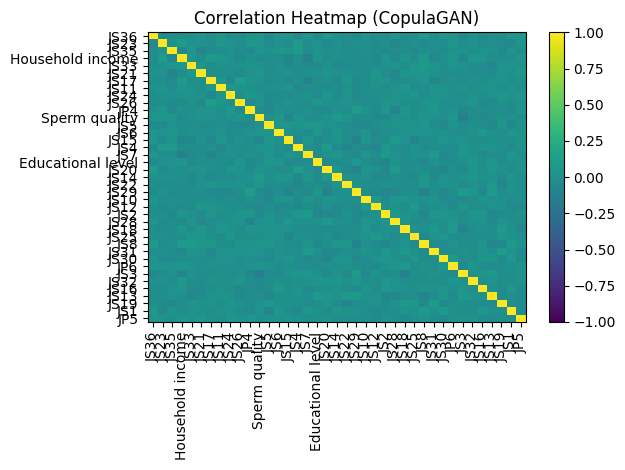

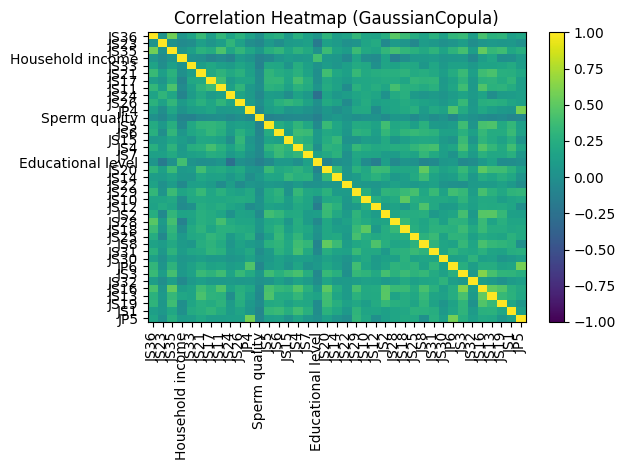

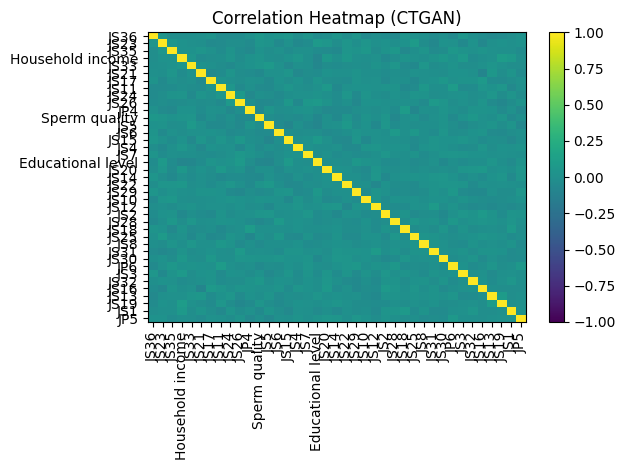

In [23]:
# -----------------------------------------------------------------------------
# 4. CORRELATION HEATMAPS
# -----------------------------------------------------------------------------
# Compare correlation matrices among real data and each synthetic dataset.
# We use plt.imshow for heatmap (no color specification for policy compliance).

def plot_correlation_heatmap(dataframe, title):
    corr_matrix = dataframe[combined_features].corr()
    plt.figure()
    plt.imshow(corr_matrix, vmin=-1, vmax=1, aspect='auto')
    plt.title(title)
    plt.colorbar()  # Add a color bar indicating correlation scale
    num_features = len(combined_features)
    plt.xticks(ticks=range(num_features), labels=combined_features, rotation=90)
    plt.yticks(ticks=range(num_features), labels=combined_features)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap for real data
plot_correlation_heatmap(real_df, "Correlation Heatmap (Real Data)")

# Plot correlation heatmap for each synthetic dataset
plot_correlation_heatmap(synthetic_tvae, "Correlation Heatmap (TVAE)")
plot_correlation_heatmap(synthetic_copula_gan, "Correlation Heatmap (CopulaGAN)")
plot_correlation_heatmap(synthetic_gaussian_copula, "Correlation Heatmap (GaussianCopula)")
plot_correlation_heatmap(synthetic_ctgan, "Correlation Heatmap (CTGAN)")

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

sns.set_context("talk")  # larger font
sns.set_style("whitegrid")  # professional-looking grid style

# Synthetic data from the four generators
df_tvae = pd.read_csv("synthetic_data_tvae.csv")
df_copula_gan = pd.read_csv("synthetic_data_copulaGan.csv")
df_gaussian_copula = pd.read_csv("synthetic_data_gaussian_copula.csv")
df_ctgan = pd.read_csv("synthetic_data_ctgan.csv")

# Merge real data into a single DataFrame
df_real = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)

# Double-check that all DataFrames have the same columns in the same order.
# If not, reorder them:
common_cols = df_real.columns.tolist()  # 39 features
df_tvae = df_tvae[common_cols]
df_copula_gan = df_copula_gan[common_cols]
df_gaussian_copula = df_gaussian_copula[common_cols]
df_ctgan = df_ctgan[common_cols]


In [49]:
df_ctgan.isnull().sum()

JS36                 0
JS23                 0
JS35                 0
Household income     0
JS33                 0
JS21                 0
JS17                 0
JS11                 0
JS24                 0
JS26                 0
JP4                  0
Sperm quality        0
JS5                  0
JS6                  0
JS15                 0
JS4                  0
JS7                  0
Educational level    0
JS20                 0
JS14                 0
JS22                 0
JS29                 0
JS10                 0
JS12                 0
JS2                  0
JS28                 0
JS18                 0
JS25                 0
JS8                  0
JS31                 0
JS30                 0
JP6                  0
JS3                  0
JS32                 0
JS16                 0
JS13                 0
JS19                 0
JS1                  0
JP5                  0
dtype: int64

In [52]:
# Label each dataset
df_real["source"] = "Real"
df_tvae["source"] = "TVAE"
df_copula_gan["source"] = "CopulaGAN"
df_gaussian_copula["source"] = "GaussianCopula"
df_ctgan["source"] = "CTGAN"

# Concatenate everything
df_all = pd.concat(
    [df_real, df_tvae, df_copula_gan, df_gaussian_copula, df_ctgan],
    axis=0
).reset_index(drop=True)

print(df_all.shape)

(4309, 40)


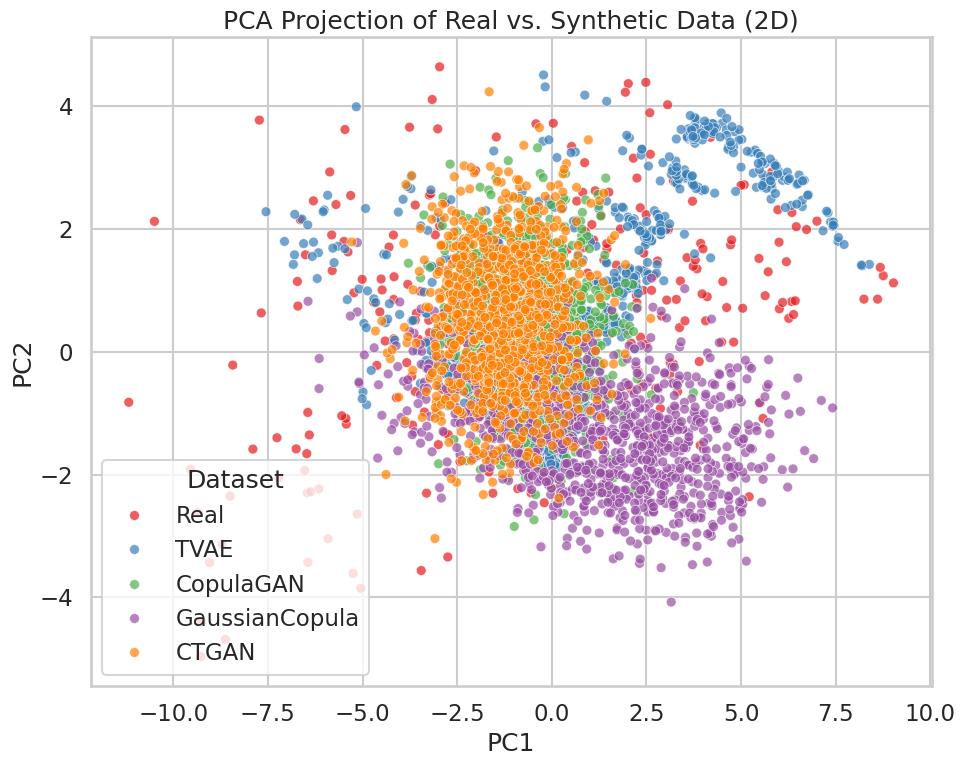


Explained variance ratio (PC1 & PC2): [0.13940456 0.05564379]


In [56]:
# Label each dataset for PCA visualization
df_real["source"] = "Real"
df_tvae["source"] = "TVAE"
df_copula_gan["source"] = "CopulaGAN"
df_gaussian_copula["source"] = "GaussianCopula"
df_ctgan["source"] = "CTGAN"

# Combine all datasets
df_all = pd.concat([df_real, df_tvae, df_copula_gan, df_gaussian_copula, df_ctgan], axis=0).reset_index(drop=True)

# Convert all feature columns to numeric (force invalid values to NaN)
for col in common_cols:  # Ensure we only convert actual features, not "source"
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

# Check for NaNs after concatenation (excluding 'source' column)
nan_summary = df_all[common_cols].isnull().sum()
if nan_summary.sum() > 0:
    print("\nWarning: Found NaNs after merging. Applying median imputation...")
    df_all[common_cols] = df_all[common_cols].fillna(df_all[common_cols].median())

# Ensure no Inf values
df_all[common_cols] = df_all[common_cols].replace([np.inf, -np.inf], np.nan)

# Remove "source" before scaling
features_only = df_all[common_cols]

# Standardize Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_only)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Store PCA Results
df_all["PC1"] = pca_result[:, 0]
df_all["PC2"] = pca_result[:, 1]

# Plot PCA Projection
plt.figure(figsize=(10, 8))
palette = sns.color_palette("Set1", n_colors=5)  # Distinct colors
sns.scatterplot(data=df_all, x="PC1", y="PC2", hue="source", palette=palette, alpha=0.7, s=50)
plt.title("PCA Projection of Real vs. Synthetic Data (2D)")
plt.legend(title="Dataset", loc="best")
plt.tight_layout()
plt.show()

# Print explained variance ratio
print("\nExplained variance ratio (PC1 & PC2):", pca.explained_variance_ratio_)

In [57]:
chosen_features = [
    "JS23", "JS36", "JS35", "JS21", "JS33",
    "JS17", "JS11", "Household income",
    "Sperm quality", "Educational level"
]


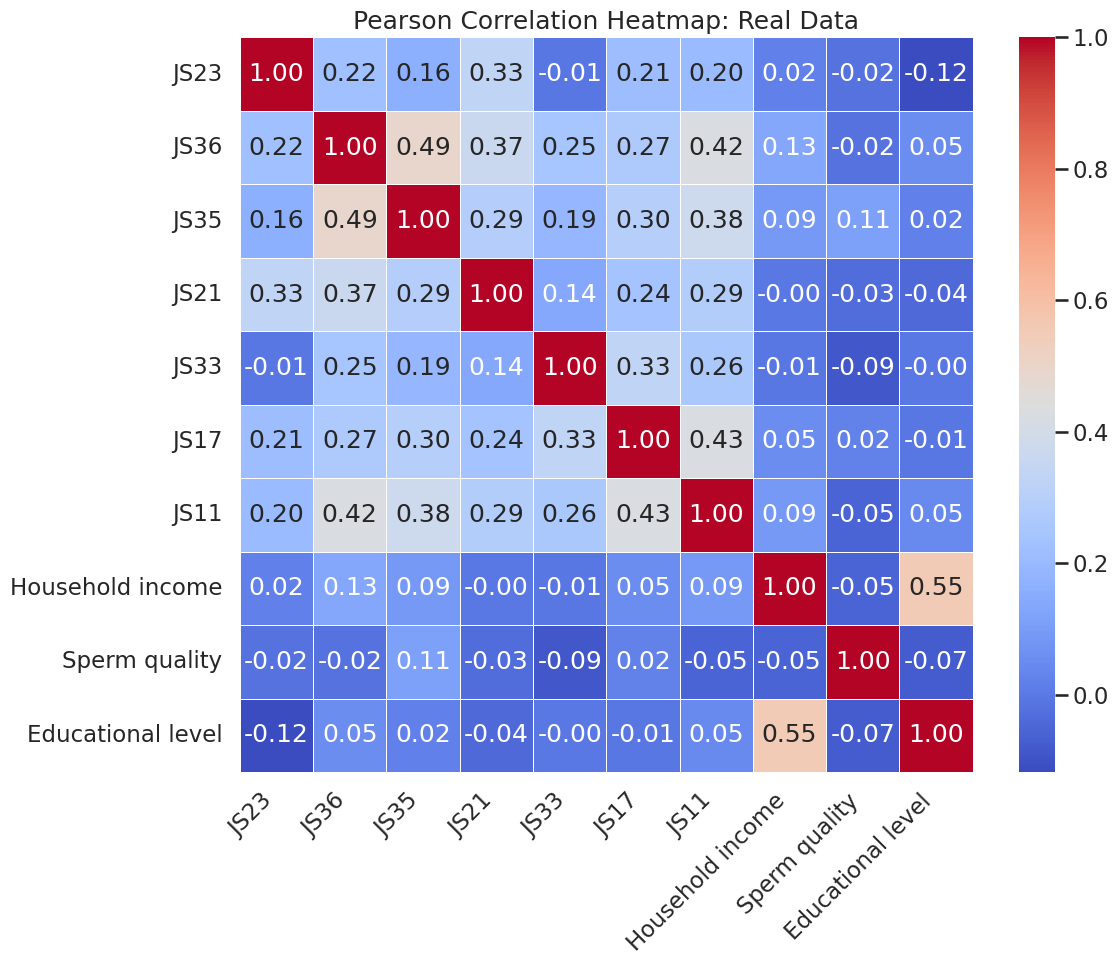

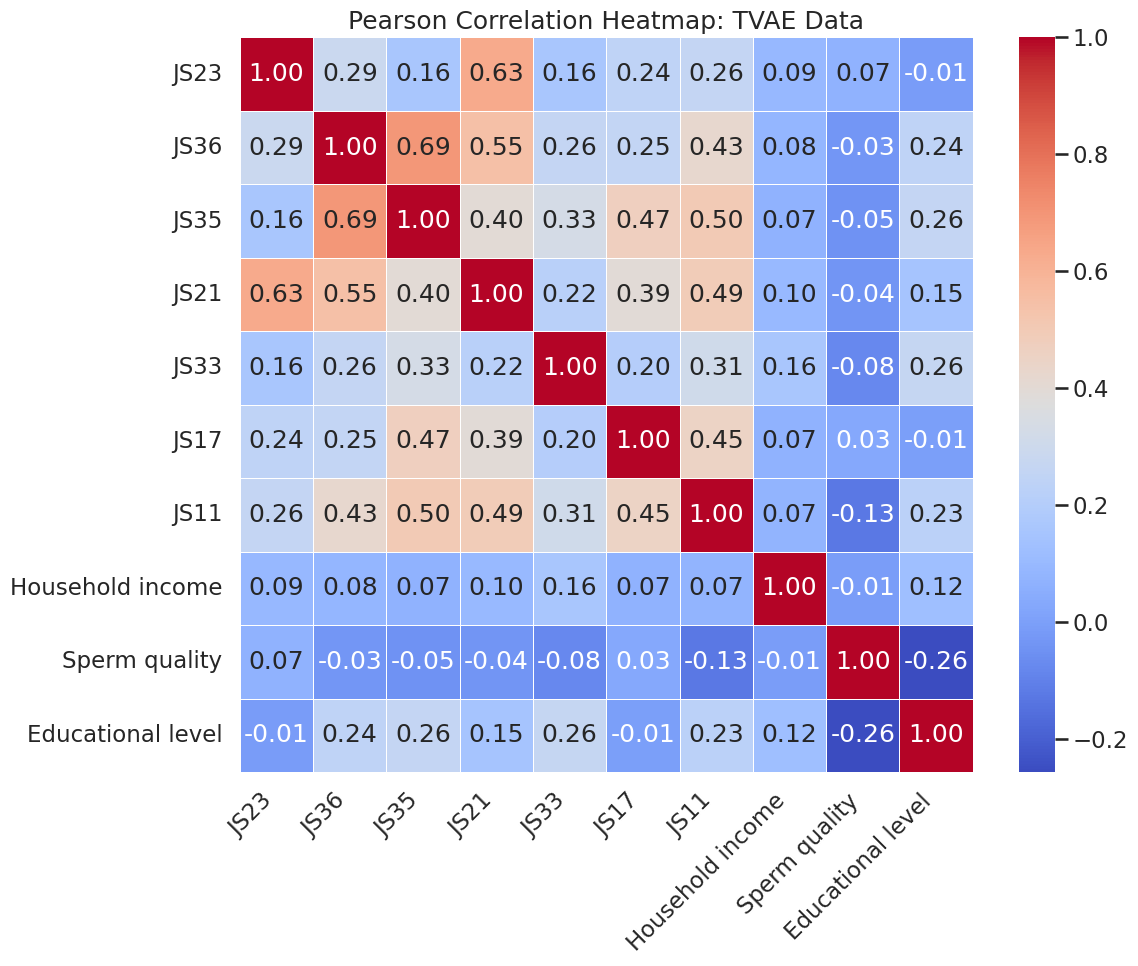

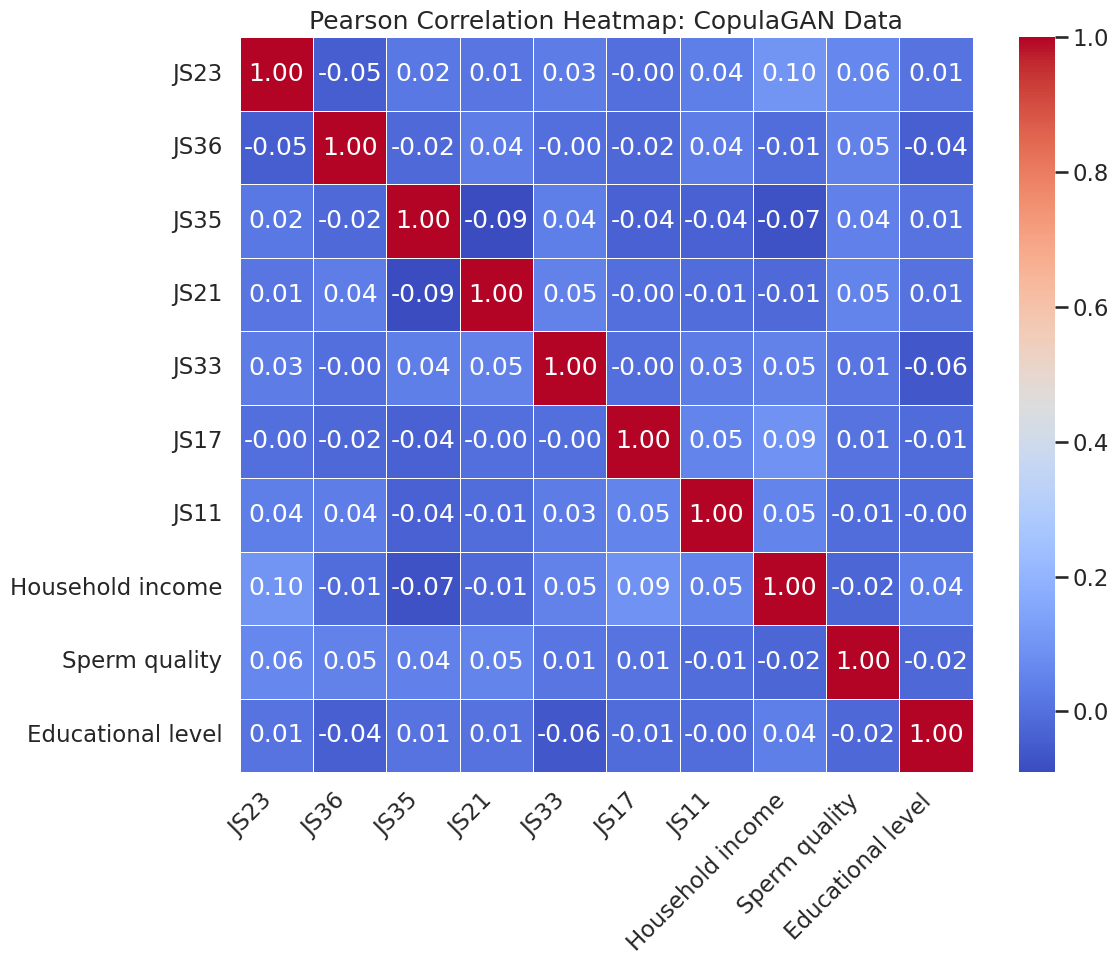

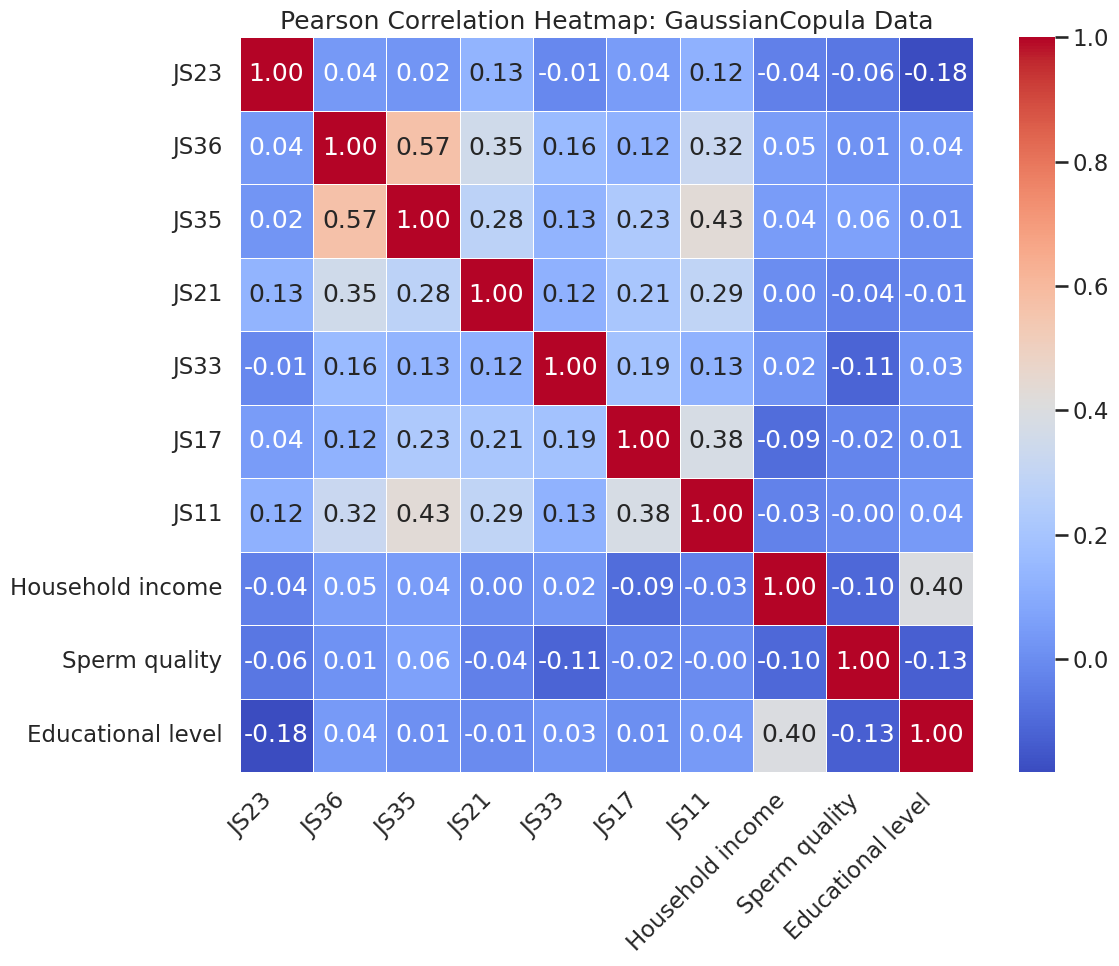

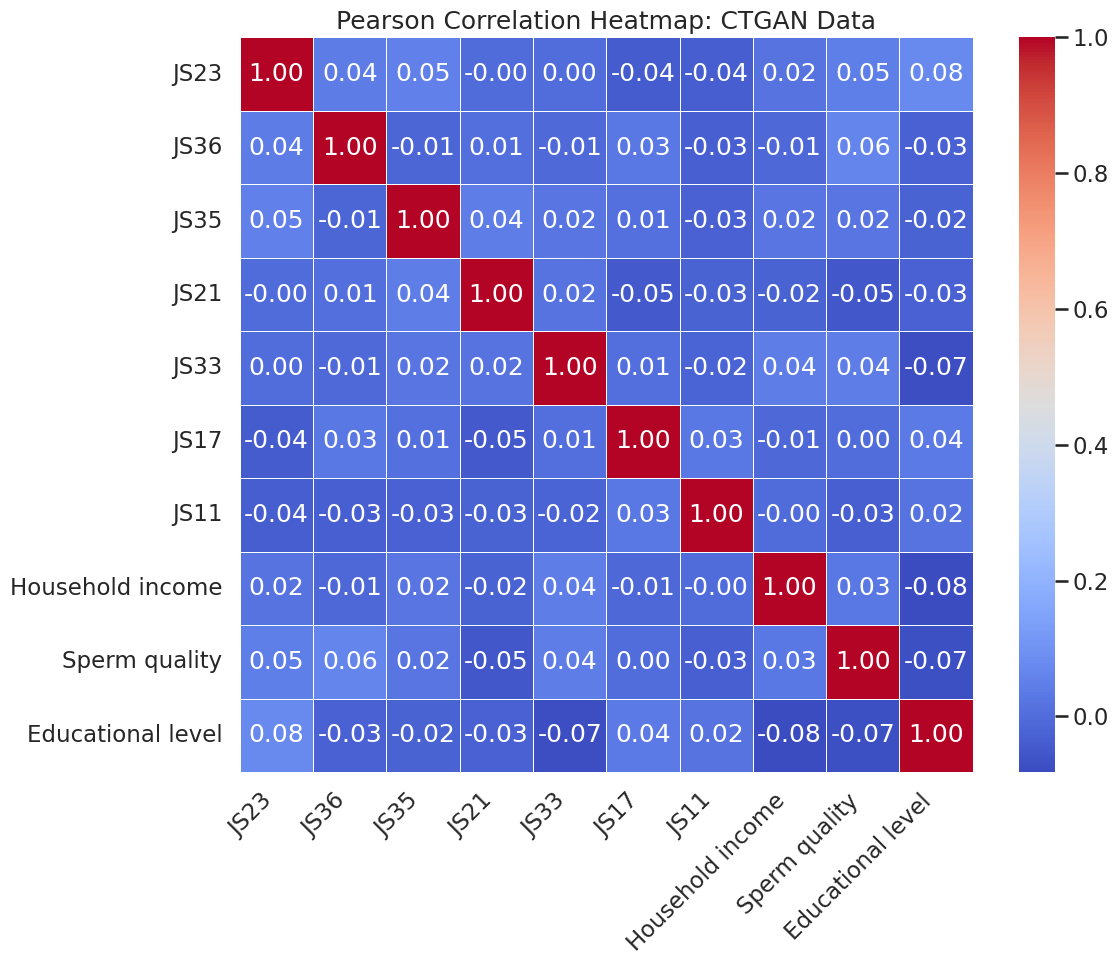

In [74]:
# Prepare a list of (dataset_name, DataFrame) for heatmaps
datasets = [
    ("Real", df_real.drop(columns="source")),
    ("TVAE", df_tvae.drop(columns="source")),
    ("CopulaGAN", df_copula_gan.drop(columns="source")),
    ("GaussianCopula", df_gaussian_copula.drop(columns="source")),
    ("CTGAN", df_ctgan.drop(columns="source"))
]

# Plot Pearson Correlation Heatmaps
for name, df in datasets:
    corr_matrix = df[chosen_features].corr(method='pearson')  # Pearson correlation matrix

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Pearson Correlation Heatmap: {name} Data")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'ace_tools'

In [62]:
!pip install ace_tools

In [66]:
# Compute Descriptive Statistics
stats_rows = []
for feature in chosen_features:
    for (name, df) in datasets:
        col_data = df[feature].dropna()

        mean_val = col_data.mean()
        median_val = col_data.median()
        std_val = col_data.std()
        skew_val = skew(col_data)        # from scipy.stats
        kurt_val = kurtosis(col_data)    # from scipy.stats

        stats_rows.append({
            "Feature": feature,
            "Dataset": name,
            "Mean": mean_val,
            "Median": median_val,
            "Std Dev": std_val,
            "Skewness": skew_val,
            "Kurtosis": kurt_val
        })

# Convert to DataFrame
stats_df = pd.DataFrame(stats_rows)

# Pivot for better readability
stats_pivot = stats_df.pivot_table(
    index="Feature",
    columns="Dataset",
    values=["Mean", "Median", "Std Dev", "Skewness", "Kurtosis"]
)

# Print full statistics table in a readable format
print(stats_pivot.round(3))  # Round to 3 decimal places for clarity



                  Kurtosis                                           Mean  \
Dataset              CTGAN CopulaGAN GaussianCopula   Real    TVAE  CTGAN   
Feature                                                                     
Educational level    0.965    -0.531         -0.092  0.498   0.687  0.556   
Household income    -0.287     1.016         -0.993 -0.935   1.012  0.278   
JS11                -1.099    -1.371          2.741 -0.582  10.892  0.680   
JS17                -1.064    -0.587          0.425 -0.188  13.821  0.646   
JS21                -0.383    -0.809         -0.601 -0.834   2.120  0.596   
JS23                -0.637    -0.753         -1.066 -0.833  -0.813  0.521   
JS33                -0.450    -1.744         -0.952  3.562   9.091  0.825   
JS35                -0.918    -0.054          0.163 -0.310   5.803  0.672   
JS36                -0.387    -1.247          1.821 -0.444   6.018  0.665   
Sperm quality        2.420    -0.680          0.607  3.950   9.084  0.173   

# Ablation Study